In [2]:
import pandas as pd

# Cargar el dataset principal
df = pd.read_csv('../data/raw/diabetes_012_health_indicators.csv')

# Mostrar las primeras filas del dataframe, la información general y estadísticas descriptivas
print("Primeras 5 filas del dataset:")
print(df.head())
print("\nInformación general del dataset:")
df.info()
print("\Estadísticas descriptivas del dataset:")
print(df.describe())

<>:11: SyntaxWarning: invalid escape sequence '\E'
<>:11: SyntaxWarning: invalid escape sequence '\E'
/tmp/ipykernel_967114/2125307437.py:11: SyntaxWarning: invalid escape sequence '\E'
  print("\Estadísticas descriptivas del dataset:")


Primeras 5 filas del dataset:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  

Excelente análisis inicial. Observamos lo siguiente:

  * **Tipos de datos:** Todas las columnas tienen un tipo de dato `float64`. Esto sugiere que las variables categóricas ya han sido codificadas numéricamente (probablemente a través de one-hot encoding o una codificación similar en el proceso de limpieza previo).
  * **Escalas variables:** Efectivamente, algunas columnas como `BMI`, `MentHlth`, `PhysHlth`, `Age`, `Education`, e `Income` tienen rangos de valores diferentes a las columnas binarias (0 o 1). `GenHlth` tiene una escala de 1 a 5. Esto es importante a considerar para futuros modelos de aprendizaje automático, ya que algunos algoritmos son sensibles a la escala de las características.
  * **Valores faltantes:** La función `info()` nos indica que todas las columnas tienen 253680 valores no nulos, lo que significa que **no hay valores faltantes** en este dataset. ¡Una buena noticia para simplificar la limpieza\!

El siguiente paso lógico es **analizar la distribución de la variable objetivo (`Diabetes_012`) para entender el problema de clasificación multiclase y el posible desbalanceo**. Además, vamos a verificar la distribución de las otras variables para tener una mejor comprensión de los datos.

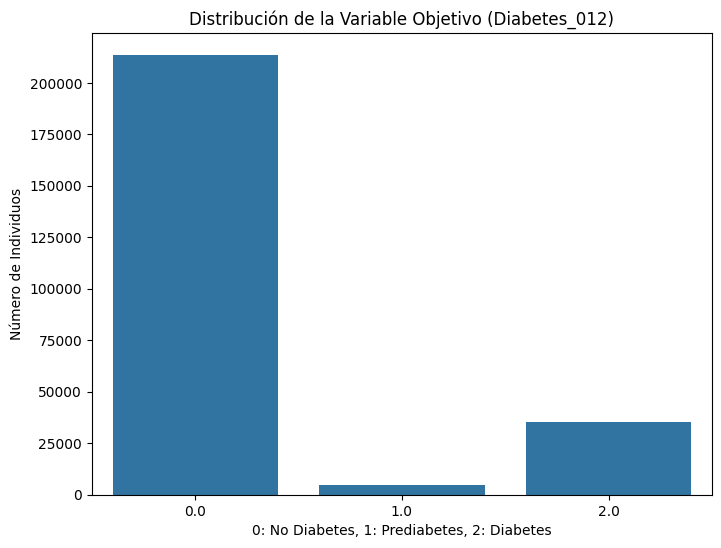


Proporción de cada clase en la variable objetivo:
Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64


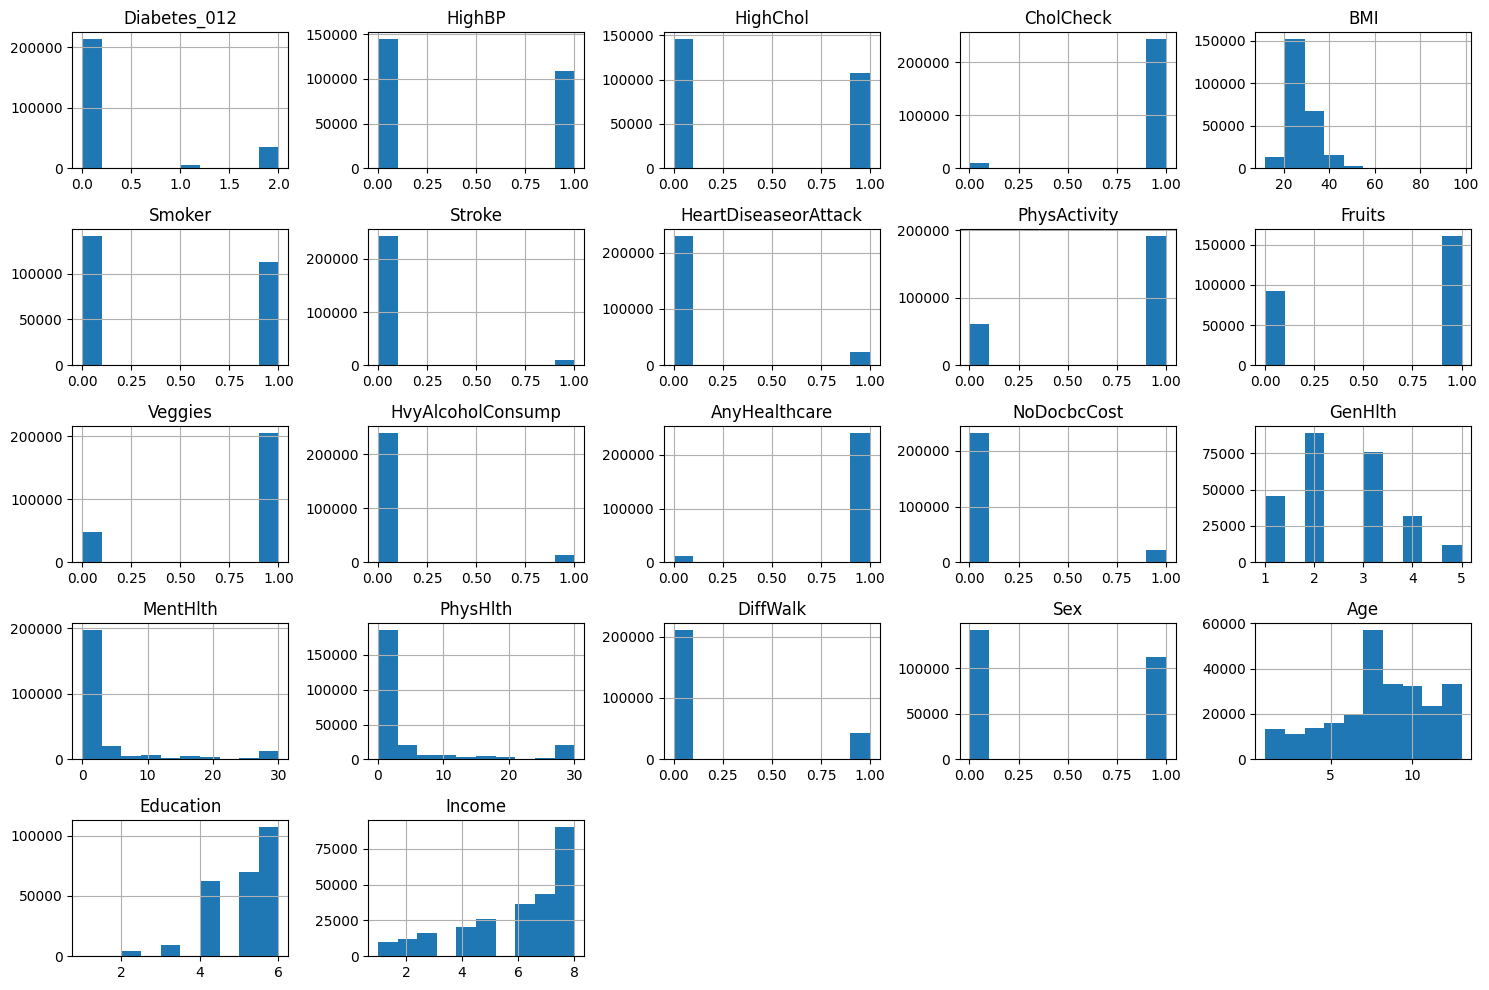

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Diabetes_012')
plt.title('Distribución de la Variable Objetivo (Diabetes_012)')
plt.xlabel('0: No Diabetes, 1: Prediabetes, 2: Diabetes')
plt.ylabel('Número de Individuos')
plt.show()

print("\nProporción de cada clase en la variable objetivo:")
print(df['Diabetes_012'].value_counts(normalize=True))

# Histogramas de las variables numéricas (para tener una idea de su distribución)
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

El desbalanceo en la variable objetivo `Diabetes_012` es bastante pronunciado:

  * **Clase 0 (No Diabetes):** Representa aproximadamente el 84.2% de los datos.
  * **Clase 2 (Diabetes):** Representa alrededor del 13.9% de los datos.
  * **Clase 1 (Prediabetes):** Es la clase minoritaria, con solo un 1.8% de las muestras.

Este desbalanceo significativo podría afectar el rendimiento de algunos modelos de clasificación, ya que podrían tender a favorecer la clase mayoritaria. Será importante abordar esto mediante técnicas de balanceo más adelante.

Los histogramas nos dan una idea de la distribución de cada variable. Observamos que muchas de las variables binarias (HighBP, HighChol, Smoker, Stroke, etc.) están fuertemente sesgadas hacia una de las dos clases. Variables como `BMI`, `MentHlth`, y `PhysHlth` muestran distribuciones con colas hacia la derecha. `Age`, `Education`, y `Income` también tienen distribuciones específicas que reflejan las categorías definidas.

Ahora, como bien señalaste, el siguiente paso crucial es **identificar y manejar los registros duplicados**. Dado que mencionaste que los duplicados se repiten más de una vez y que una parte importante se encuentra en la clase mayoritaria (No Diabetes), eliminarlos podría ayudar a reducir el desbalanceo.

Aquí tienes el código para identificar cuántas veces se repite cada fila en el DataFrame y luego eliminar los duplicados, manteniendo la primera ocurrencia:

### **Snippet: Punto de Entrada para Preprocesamiento de Datos**  

#### **📌 Importaciones y Rutas**  
Configura las librerías necesarias y define las rutas a tus datos brutos y al directorio donde se guardarán los datos procesados.  
- **`sys.path.append`** es crucial para que Python pueda encontrar los módulos en tu carpeta `src/`.  

```python
import sys
sys.path.append("src/")  # 👈 Asegura que Python detecte los módulos en src/
from data_loader import load_raw_data
from data_preprocessing import remove_duplicates_and_save
```

#### **📥 Carga de Datos Brutos**  
Utiliza **`load_raw_data`** (de `src/data_loader.py`) para cargar tu archivo CSV original.  
- **`df_raw`** puede contener duplicados.  

```python
df_raw = load_raw_data("data/raw/dataset.csv")  # 🗃️ Carga el dataset original
```

#### **♻️ Gestión de Duplicados**  
La línea clave es:  
```python
df_unique = remove_duplicates_and_save(df_raw, "data/processed/df_unique.parquet")  
```  
**¿Qué hace esta función?**  
1. **Verifica** si `df_unique.parquet` ya existe.  
   - Si **sí existe**, lo carga y evita reprocesamiento. ✅  
   - Si **no existe**, elimina duplicados de `df_raw`, guarda el resultado en `.parquet` y lo retorna. 🔄  
2. **Ventajas**:  
   - **Evita código repetitivo** en el notebook.  
   - **Optimiza tiempo** al no reprocesar datos innecesariamente.  

#### **🚀 Continuidad del Pipeline**  
Una vez ejecutado:  
- **`df_unique`** contendrá el DataFrame sin duplicados.  
- **Listo** para los siguientes pasos:  
  - Escalado de características.  
  - Remuestreo (oversampling/undersampling).  
  - Entrenamiento de modelos.  

---

**Nota**: Este enfoque modularizado sigue buenas prácticas de **MLOps**, separando la lógica de carga/preprocesamiento en archivos independientes (`src/`).  

In [3]:
# --- Notebook para la carga y preprocesamiento de datos ---
# Este notebook se encarga de cargar el dataset original, eliminar duplicados y guardar el dataset limpio.
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Añadir el directorio raíz del proyecto al sys.path para que funcione el import de src
# Esto es crucial si ejecutas el notebook desde el subdirectorio 'notebooks'
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Importar las funciones de nuestros módulos
from src.data_loader import load_raw_data # Para cargar el DataFrame original
from src.data_preprocessor import remove_duplicates_and_save # Para la lógica de duplicados

# --- Configuración de rutas ---
# Ajusta la ruta de tu archivo CSV original si es diferente
RAW_DATA_PATH = '../data/raw/diabetes_012_health_indicators.csv'
PROCESSED_DATA_DIR = '../data/processed_data' # Donde se guardará df_unique.parquet

# Asegurar que el directorio de datos procesados exista
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)


# --- Cargar el DataFrame original (df) ---
# Esta parte asume que tu CSV está en ../data/raw/
# df_raw contendrá el DataFrame tal cual se lee del CSV (posiblemente con duplicados).
df_raw = load_raw_data(RAW_DATA_PATH)

# --- Eliminar duplicados y obtener df_unique ---
# Se llama a la función modularizada. Esta función se encarga internamente de:
# 1. Verificar si 'df_unique.parquet' ya existe y es válido en PROCESSED_DATA_DIR.
# 2. Si existe, lo carga directamente.
# 3. Si no existe, realiza la eliminación de duplicados a partir de 'df_raw',
#    imprime las estadísticas de duplicados, muestra un plot de la distribución
#    de la variable objetivo y guarda el 'df_unique.parquet' resultante.
# La función devuelve siempre el DataFrame sin duplicados, ya sea cargado o recién creado.
df_unique = remove_duplicates_and_save(df_raw, PROCESSED_DATA_DIR, target_column='Diabetes_012')


# Ahora puedes continuar con tu análisis o pasar df_unique a la siguiente etapa.
# df_unique es el DataFrame limpio y sin duplicados que usarás de aquí en adelante.
print("\nDataFrame único (df_unique) listo para el siguiente paso de preprocesamiento.")
print(df_unique.head())

# Nota: Si el resto de tu notebook usa una variable llamada `df`,
# puedes reasignar `df = df_unique` aquí para mantener la compatibilidad.
# Sin embargo, es buena práctica usar el nombre `df_unique` para mayor claridad.
# df = df_unique

Cargando datos brutos desde: ../data/raw/diabetes_012_health_indicators.csv
Datos brutos cargados exitosamente.
Cargando df_unique desde ../data/processed_data/df_unique.parquet...
df_unique cargado exitosamente.

DataFrame único (df_unique) listo para el siguiente paso de preprocesamiento.
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3          

La eliminación de duplicados redujo significativamente el tamaño del dataset y, lo que es muy importante, disminuyó ligeramente el desbalanceo al eliminar proporcionalmente más registros de la clase mayoritaria (No Diabetes). Las nuevas proporciones son:

  * **Clase 0 (No Diabetes):** \~82.7%
  * **Clase 2 (Diabetes):** \~15.3%
  * **Clase 1 (Prediabetes):** \~2.0%

Aunque la clase de prediabetes sigue siendo minoritaria, la reducción en la clase mayoritaria es un paso positivo.

El siguiente paso crucial es **separar la variable objetivo (`Diabetes_012`) de las características predictoras**. Esto nos permitirá preparar los datos para el modelado. Además, dado que algunas de las características tienen escalas diferentes, consideraremos la **estandarización o normalización** de las características numéricas para que tengan una escala similar. Esto es importante para muchos algoritmos de aprendizaje automático.

Aquí tienes el código para realizar esta separación y preparar un escalador estándar:

Cargando datos preprocesados y escalador desde archivos...
Datos cargados exitosamente.
Datos preprocesados cargados exitosamente desde archivos joblib.

--- Iniciando optimización de hiperparámetros (Randomized Search) ---

Procesando modelo: Logistic Regression
Iniciando optimización para Logistic Regression con datos Original...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(Logistic

Mejores parámetros encontrados: {'penalty': 'l1', 'C': 0.01}
Mejor F1-Weighted Score (CV): 0.7980
Modelo optimizado guardado: ../trained_models/Logistic_Regression_Original_tuned.joblib
Informe guardado: ../docs/model_performance_reports/Logistic_Regression_Original_tuned_report.md
Iniciando optimización para Logistic Regression con datos SMOTE...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(Logistic

Mejores parámetros encontrados: {'penalty': 'l2', 'C': 10}
Mejor F1-Weighted Score (CV): 0.4990
Modelo optimizado guardado: ../trained_models/Logistic_Regression_SMOTE_tuned.joblib
Informe guardado: ../docs/model_performance_reports/Logistic_Regression_SMOTE_tuned_report.md
Iniciando optimización para Logistic Regression con datos RUS...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(Logistic

Mejores parámetros encontrados: {'penalty': 'l1', 'C': 100}
Mejor F1-Weighted Score (CV): 0.4756
Modelo optimizado guardado: ../trained_models/Logistic_Regression_RUS_tuned.joblib
Informe guardado: ../docs/model_performance_reports/Logistic_Regression_RUS_tuned_report.md
Iniciando optimización para Logistic Regression con datos SMOTE-ENN...
Saltando Logistic Regression con datos SMOTE-ENN: Datos base no disponibles.
Iniciando optimización para Logistic Regression con datos SMOTE-Tomek...
Saltando Logistic Regression con datos SMOTE-Tomek: Datos base no disponibles.
Resultados actuales guardados en ../docs/model_evaluation_summaries/results_metrics.joblib

Procesando modelo: Random Forest
Iniciando optimización para Random Forest con datos Original...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores parámetros encontrados: {'n_estimators': 200, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Mejor F1-Weighted Score (CV): 0.7944
Modelo optimizado guardado: ../trained_models/Random_Forest_Original_tuned.joblib
Informe guardado: ../docs/model_performance_reports/Random_Forest_Original_tuned_report.md
Iniciando optimización para Random Forest con datos SMOTE...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores parámetros encontrados: {'n_estimators': 300, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
Mejor F1-Weighted Score (CV): 0.8805
Modelo optimizado guardado: ../trained_models/Random_Forest_SMOTE_tuned.joblib
Informe guardado: ../docs/model_performance_reports/Random_Forest_SMOTE_tuned_report.md
Iniciando optimización para Random Forest con datos RUS...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Mejores parámetros encontrados: {'n_estimators': 300, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
Mejor F1-Weighted Score (CV): 0.4888
Modelo optimizado guardado: ../trained_models/Random_Forest_RUS_tuned.joblib
Informe guardado: ../docs/model_performance_reports/Random_Forest_RUS_tuned_report.md
Iniciando optimización para Random Forest con datos SMOTE-ENN...
Saltando Random Forest con datos SMOTE-ENN: Datos base no disponibles.
Iniciando optimización para Random Forest con datos SMOTE-Tomek...
Saltando Random Forest con datos S

/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

Modelo optimizado guardado: ../trained_models/Gradient_Boosting_Original_tuned.joblib
Informe guardado: ../docs/model_performance_reports/Gradient_Boosting_Original_tuned_report.md
Iniciando optimización para Gradient Boosting con datos SMOTE...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Mejores parámetros encontrados: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
Mejor F1-Weighted Score (CV): 0.7742
Modelo optimizado guardado: ../trained_models/Gradient_Boosting_SMOTE_tuned.joblib
Informe guardado: ../docs/model_performance_reports/Gradient_Boosting_SMOTE_tuned_report.md
Iniciando optimización para Gradient Boosting con datos RUS...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

Mejores parámetros encontrados: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Mejor F1-Weighted Score (CV): 0.4978
Modelo optimizado guardado: ../trained_models/Gradient_Boosting_RUS_tuned.joblib
Informe guardado: ../docs/model_performance_reports/Gradient_Boosting_RUS_tuned_report.md
Iniciando optimización para Gradient Boosting con datos SMOTE-ENN...
Saltando Gradient Boosting con datos SMOTE-ENN: Datos base no disponibles.
Iniciando optimización para Gradient Boosting con datos SMOTE-Tomek...
Saltando Gradient Boosting con datos SMOTE-Tomek: Datos base no disponibles.
Resultados actuales guardados en ../docs/model_evaluation_summaries/results_metrics.joblib

Procesando modelo: XGBoost
Iniciando optimización para XGBoost con datos Original...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [01:15:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [01:15:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [01:15:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/x

Mejores parámetros encontrados: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
Mejor F1-Weighted Score (CV): 0.7937
Modelo optimizado guardado: ../trained_models/XGBoost_Original_tuned.joblib
Informe guardado: ../docs/model_performance_reports/XGBoost_Original_tuned_report.md
Iniciando optimización para XGBoost con datos SMOTE...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

Mejores parámetros encontrados: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
Mejor F1-Weighted Score (CV): 0.7229
Modelo optimizado guardado: ../trained_models/XGBoost_SMOTE_tuned.joblib
Informe guardado: ../docs/model_performance_reports/XGBoost_SMOTE_tuned_report.md
Iniciando optimización para XGBoost con datos RUS...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [01:18:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [01:18:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [01:18:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/x

Mejores parámetros encontrados: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
Mejor F1-Weighted Score (CV): 0.4950
Modelo optimizado guardado: ../trained_models/XGBoost_RUS_tuned.joblib
Informe guardado: ../docs/model_performance_reports/XGBoost_RUS_tuned_report.md
Iniciando optimización para XGBoost con datos SMOTE-ENN...
Saltando XGBoost con datos SMOTE-ENN: Datos base no disponibles.
Iniciando optimización para XGBoost con datos SMOTE-Tomek...
Saltando XGBoost con datos SMOTE-Tomek: Datos base no disponibles.
Resultados actuales guardados en ../docs/model_evaluation_summaries/results_metrics.joblib

--- Optimización de hiperparámetros completada ---

--- RESUMEN DE RESULTADOS DE LOS MODELOS OPTIMIZADOS ---

Resultados para Logistic Regression (Optimizado con Original):
  Mejores Parámetros: {'penalty': 'l1', 'C': 0.01}
  Mejor Score CV: 0.7980
  Tiempo de Optimización: 25.26 segundos
  Classification Report:
              precision    recall  f1-score

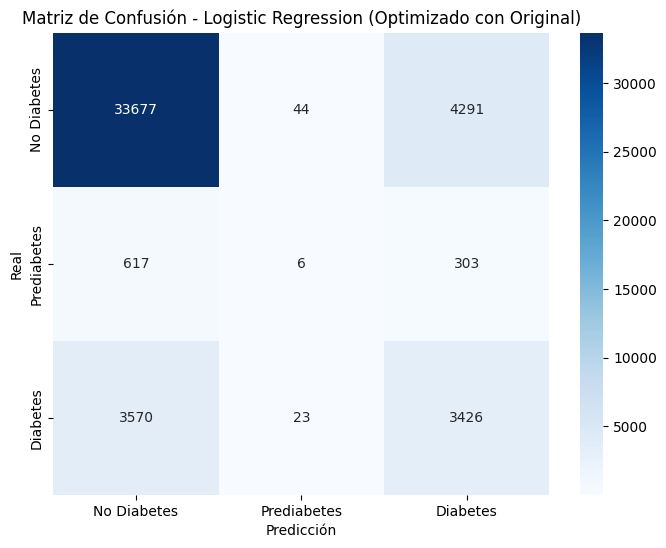


Resultados para Logistic Regression (Optimizado con SMOTE):
  Mejores Parámetros: {'penalty': 'l2', 'C': 10}
  Mejor Score CV: 0.4990
  Tiempo de Optimización: 43.30 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.94      0.67      0.78     38012
 Prediabetes       0.03      0.27      0.06       926
    Diabetes       0.36      0.60      0.45      7019

    accuracy                           0.65     45957
   macro avg       0.45      0.51      0.43     45957
weighted avg       0.83      0.65      0.71     45957



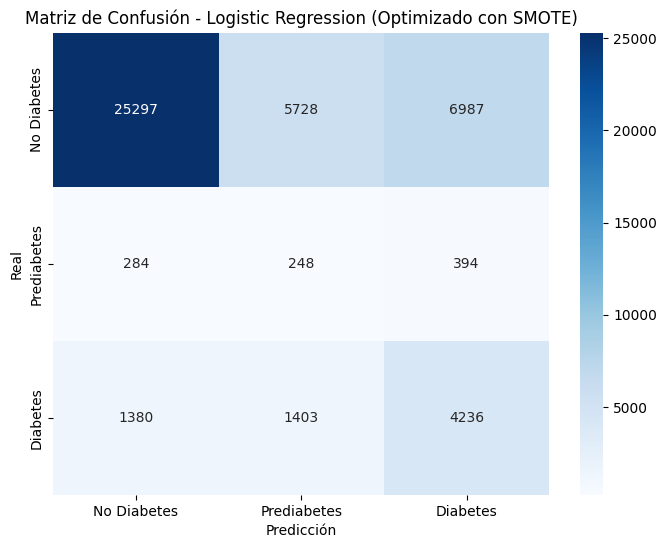


Resultados para Logistic Regression (Optimizado con RUS):
  Mejores Parámetros: {'penalty': 'l1', 'C': 100}
  Mejor Score CV: 0.4756
  Tiempo de Optimización: 0.96 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.94      0.67      0.78     38012
 Prediabetes       0.03      0.25      0.06       926
    Diabetes       0.35      0.61      0.45      7019

    accuracy                           0.65     45957
   macro avg       0.44      0.51      0.43     45957
weighted avg       0.83      0.65      0.71     45957



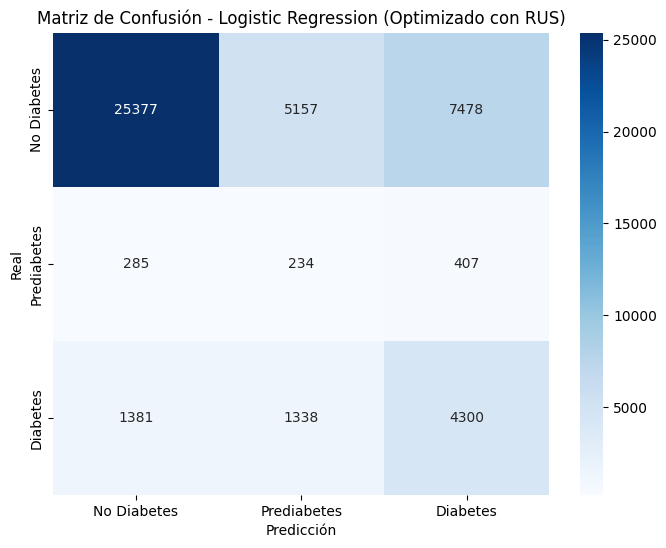


Resultados para Random Forest (Optimizado con Original):
  Mejores Parámetros: {'n_estimators': 200, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
  Mejor Score CV: 0.7944
  Tiempo de Optimización: 376.27 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.88      0.90      0.89     38012
 Prediabetes       0.04      0.01      0.02       926
    Diabetes       0.41      0.40      0.41      7019

    accuracy                           0.80     45957
   macro avg       0.44      0.44      0.44     45957
weighted avg       0.79      0.80      0.80     45957



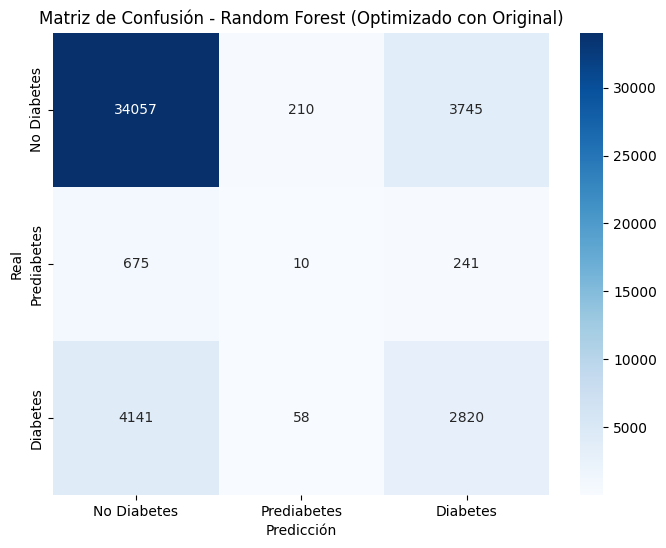


Resultados para Random Forest (Optimizado con SMOTE):
  Mejores Parámetros: {'n_estimators': 300, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
  Mejor Score CV: 0.8805
  Tiempo de Optimización: 5889.03 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.88      0.90      0.89     38012
 Prediabetes       0.06      0.00      0.01       926
    Diabetes       0.44      0.43      0.44      7019

    accuracy                           0.81     45957
   macro avg       0.46      0.45      0.45     45957
weighted avg       0.80      0.81      0.81     45957



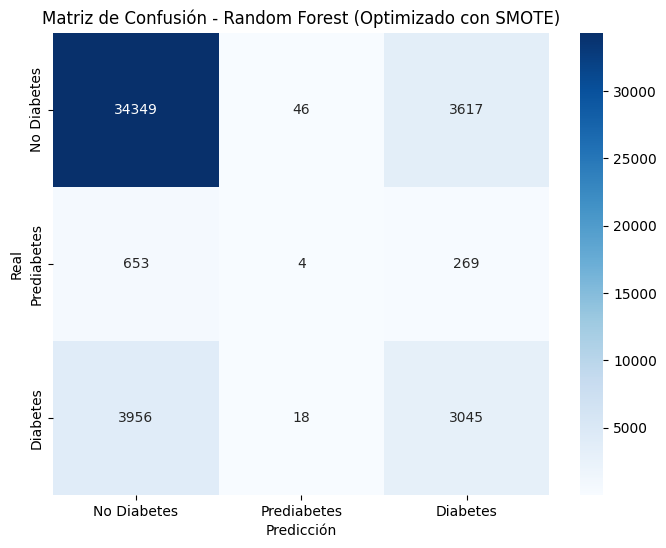


Resultados para Random Forest (Optimizado con RUS):
  Mejores Parámetros: {'n_estimators': 300, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
  Mejor Score CV: 0.4888
  Tiempo de Optimización: 16.16 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.95      0.62      0.75     38012
 Prediabetes       0.03      0.34      0.06       926
    Diabetes       0.36      0.59      0.45      7019

    accuracy                           0.61     45957
   macro avg       0.45      0.52      0.42     45957
weighted avg       0.84      0.61      0.69     45957



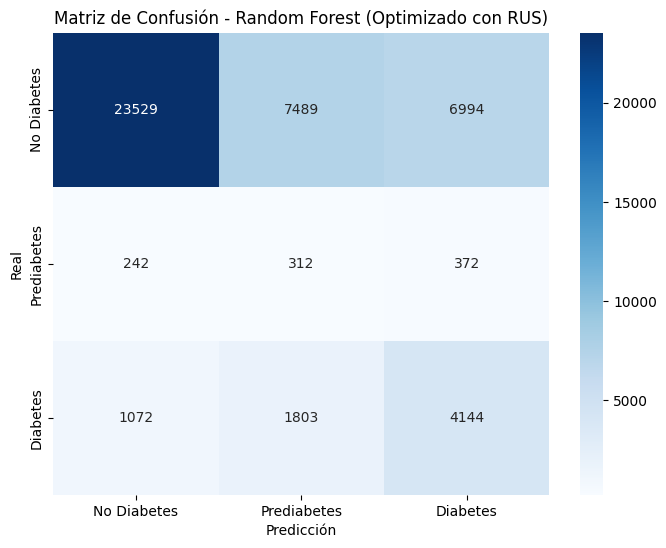


Resultados para Gradient Boosting (Optimizado con Original):
  Mejores Parámetros: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
  Mejor Score CV: 0.7933
  Tiempo de Optimización: 1235.57 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.85      0.98      0.91     38012
 Prediabetes       0.00      0.00      0.00       926
    Diabetes       0.59      0.20      0.30      7019

    accuracy                           0.84     45957
   macro avg       0.48      0.39      0.40     45957
weighted avg       0.79      0.84      0.80     45957



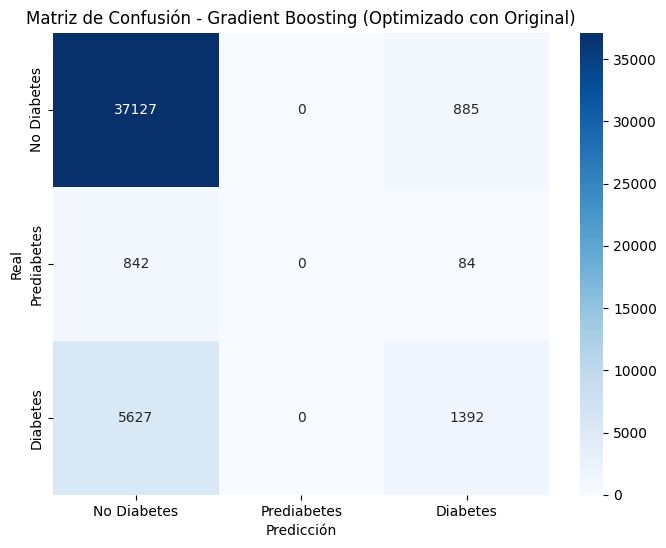


Resultados para Gradient Boosting (Optimizado con SMOTE):
  Mejores Parámetros: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
  Mejor Score CV: 0.7742
  Tiempo de Optimización: 9361.33 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.86      0.96      0.91     38012
 Prediabetes       0.00      0.00      0.00       926
    Diabetes       0.53      0.29      0.37      7019

    accuracy                           0.84     45957
   macro avg       0.46      0.41      0.43     45957
weighted avg       0.79      0.84      0.81     45957



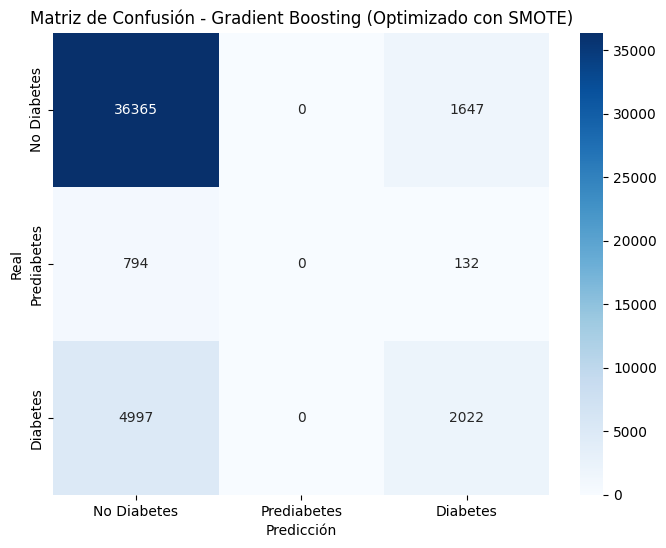


Resultados para Gradient Boosting (Optimizado con RUS):
  Mejores Parámetros: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
  Mejor Score CV: 0.4978
  Tiempo de Optimización: 51.12 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.95      0.61      0.74     38012
 Prediabetes       0.03      0.34      0.06       926
    Diabetes       0.36      0.60      0.45      7019

    accuracy                           0.60     45957
   macro avg       0.45      0.52      0.42     45957
weighted avg       0.84      0.60      0.68     45957



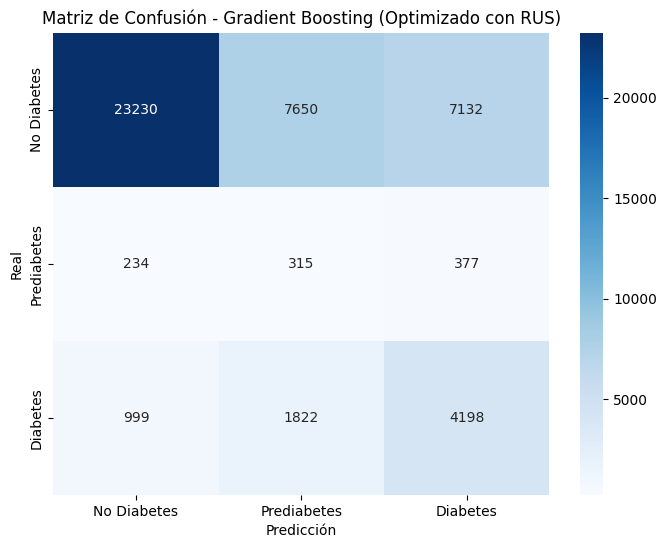


Resultados para XGBoost (Optimizado con Original):
  Mejores Parámetros: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
  Mejor Score CV: 0.7937
  Tiempo de Optimización: 44.88 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.85      0.98      0.91     38012
 Prediabetes       0.00      0.00      0.00       926
    Diabetes       0.59      0.20      0.30      7019

    accuracy                           0.84     45957
   macro avg       0.48      0.39      0.40     45957
weighted avg       0.79      0.84      0.80     45957



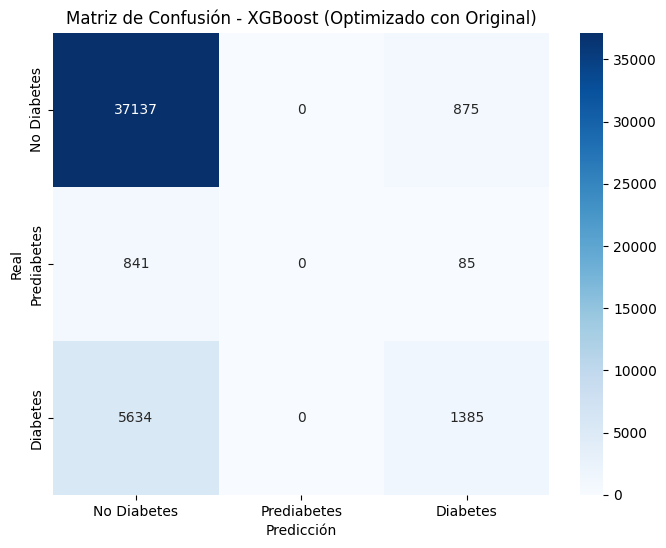


Resultados para XGBoost (Optimizado con SMOTE):
  Mejores Parámetros: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
  Mejor Score CV: 0.7229
  Tiempo de Optimización: 120.39 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.88      0.92      0.90     38012
 Prediabetes       0.00      0.00      0.00       926
    Diabetes       0.47      0.41      0.44      7019

    accuracy                           0.83     45957
   macro avg       0.45      0.44      0.45     45957
weighted avg       0.80      0.83      0.81     45957



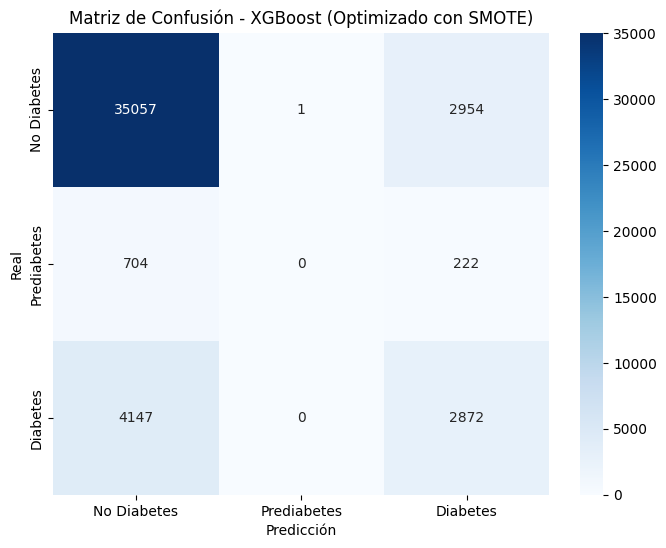


Resultados para XGBoost (Optimizado con RUS):
  Mejores Parámetros: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
  Mejor Score CV: 0.4950
  Tiempo de Optimización: 5.18 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.95      0.61      0.74     38012
 Prediabetes       0.03      0.34      0.06       926
    Diabetes       0.36      0.59      0.45      7019

    accuracy                           0.60     45957
   macro avg       0.45      0.51      0.42     45957
weighted avg       0.84      0.60      0.68     45957



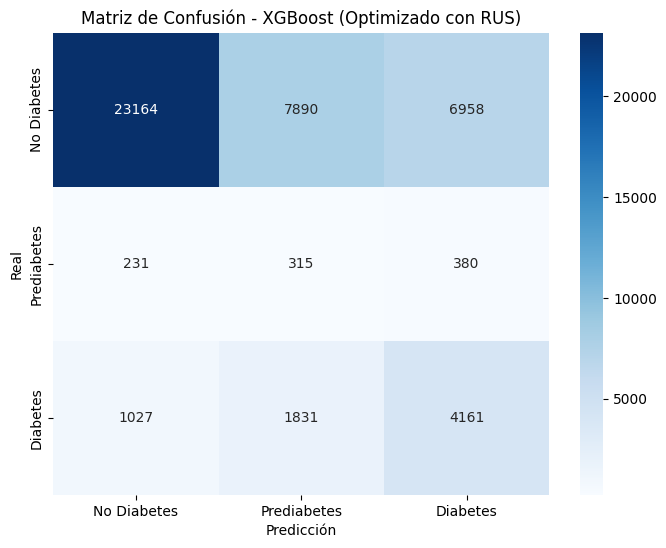

In [ ]:
# notebooks/02_preprocessing_and_model_tuning.ipynb (Nombre sugerido para claridad)

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))  # Añade el directorio padre al path

import pandas as pd
import joblib # Para cargar/guardar results_metrics.joblib

# Importar las funciones de nuestros módulos
from src.data_loader import load_raw_data
from src.data_preprocessor import preprocess_and_resample_data, check_and_load_processed_data, remove_duplicates_and_save
from src.resamplers import apply_hybrid_resampling
from src.model_evaluator import save_model_and_report

# Importaciones adicionales para los modelos y métricas
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import make_scorer, f1_score, recall_score, classification_report, confusion_matrix, precision_score
from sklearn.model_selection import RandomizedSearchCV
import time
import seaborn as sns
import matplotlib.pyplot as plt


# --- Configuración de rutas ---
# Se asume que este notebook está en 'notebooks/'
# y los datos procesados en '../data/processed_data'
# y los informes en '../docs/model_performance_reports'
# y los modelos entrenados en '../trained_models'
# Ajusta según tu estructura real

UNIQUE_DATA_PATH = '../data/processed_data/df_unique.parquet'
PROCESSED_DATA_DIR = '../data/processed_data'
MODELS_DIR = '../trained_models'
REPORTS_DIR = '../docs/model_performance_reports'
MODEL_EVAL_RESULTS_DIR = os.path.join('../docs', 'model_evaluation_summaries')
RESULTS_METRICS_FILE = os.path.join(MODEL_EVAL_RESULTS_DIR, 'results_metrics.joblib')


# Asegurarse de que los directorios necesarios existan
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(REPORTS_DIR, exist_ok=True)
os.makedirs(MODEL_EVAL_RESULTS_DIR, exist_ok=True)


# --- Cargar o Preprocesar Datos ---
# Primero, intenta cargar los datos ya procesados (X_train_scaled, etc.)
loaded_data_tuple = check_and_load_processed_data(PROCESSED_DATA_DIR)
data_loaded = loaded_data_tuple[0]
data = loaded_data_tuple[1]

if data_loaded:
    # Desempaquetar los datos si se cargaron exitosamente
    X_train_scaled, X_test_scaled, y_train, y_test, scaler, \
    X_train_smote_prev, y_train_smote_prev, X_train_rus_prev, y_train_rus_prev, \
    X_train_smoteenn, y_train_smoteenn, X_train_smotetomek, y_train_smotetomek = data
    print("Datos preprocesados y remuestreados (incluyendo híbridos) cargados exitosamente desde archivos.")
else:
    # Si los datos no se cargaron, procesarlos desde el inicio.
    print("Iniciando preprocesamiento completo (división, escalado, remuestreo inicial y híbrido)...")
    
    df_unique_path_to_load = os.path.join(PROCESSED_DATA_DIR, 'df_unique.parquet')
    if not os.path.exists(df_unique_path_to_load):
        # Si df_unique no existe, cargar datos brutos y eliminar duplicados
        print(f"df_unique.parquet no encontrado en {df_unique_path_to_load}. Cargando datos brutos y eliminando duplicados...")
        df_raw = load_raw_data()
        df_unique = remove_duplicates_and_save(df_raw, PROCESSED_DATA_DIR)
    else:
        # Si df_unique existe, cargarlo para el preprocesamiento subsiguiente
        df_unique = pd.read_parquet(df_unique_path_to_load)
        print(f"df_unique cargado desde {df_unique_path_to_load} para el preprocesamiento subsiguiente.")

    # Aquí se pasa df_unique (sin duplicados) a la función de preprocesamiento y remuestreo
    X_train_scaled, X_test_scaled, y_train, y_test, scaler, \
    X_train_smote_prev, y_train_smote_prev, X_train_rus_prev, y_train_rus_prev, \
    X_train_smoteenn, y_train_smoteenn, X_train_smotetomek, y_train_smotetomek = \
        preprocess_and_resample_data(df_unique, PROCESSED_DATA_DIR)


# --- Conjuntos de entrenamiento a utilizar para la optimización ---
# Ahora los conjuntos híbridos ya deberían estar cargados si data_loaded es True,
# o generados y guardados si data_loaded es False.
train_sets_for_tuning = {
    'Original': (X_train_scaled, y_train),
    'SMOTE': (X_train_smote_prev, y_train_smote_prev),
    'RUS': (X_train_rus_prev, y_train_rus_prev),
    'SMOTE-ENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTE-Tomek': (X_train_smotetomek, y_train_smotetomek),
}

# --- Bucle de Optimización ---
print("\n--- Iniciando optimización de hiperparámetros (Randomized Search) ---")

# Modelos seleccionados para optimización de hiperparámetros
models_for_tuning = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr', class_weight='balanced', max_iter=5000),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=3)
}

# Rejillas de parámetros (se mantienen)
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [10, 20, 30, None],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 0.9]
    }
}

# Scorer principal para optimización (F1-weighted para evaluación general)
scorer_f1_weighted = make_scorer(f1_score, average='weighted')

# Nuevo scorer para priorizar la precisión de la clase 'Prediabetes' (clase 1.0)
# Puedes elegir entre precision o recall, o incluso una combinación.
# Para tu caso, donde la precisión es muy baja, enfocar en precision_score para la clase 1.0 es clave.
scorer_precision_prediabetes = make_scorer(precision_score, average=None, labels=[1], zero_division=0)
# Si quieres usar recall: scorer_recall_prediabetes = make_scorer(recall_score, average=None, labels=[1], zero_division=0)

# Cargar resultados previos si existen
results = {}
if os.path.exists(RESULTS_METRICS_FILE):
    try:
        results = joblib.load(RESULTS_METRICS_FILE)
        print(f"Resultados previos cargados desde {RESULTS_METRICS_FILE}")
    except Exception as e:
        print(f"Error al cargar resultados previos: {e}. Se inicializarán los resultados.")
        results = {}

# Añadir los nombres de los conjuntos de datos que se usarán para el tuning
set_names_to_tune = ['Original', 'SMOTE', 'RUS', 'SMOTE-ENN', 'SMOTE-Tomek']

for name, model_instance in models_for_tuning.items():
    print(f"\nProcesando modelo: {name}")
    for set_name in set_names_to_tune:
        result_key = f"{name}_tuned_with_{set_name}"

        # Comprobar si ya se ha optimizado y guardado
        if result_key in results and 'best_params' in results[result_key]:
            print(f"Saltando optimización de {name} con datos {set_name} (ya optimizado y guardado).")
            # Recalcular métricas para asegurar que estén actualizadas si se cargó el modelo
            optimized_model_filename = os.path.join(MODELS_DIR, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}_tuned.joblib")
            if os.path.exists(optimized_model_filename):
                try:
                    optimized_model = joblib.load(optimized_model_filename)
                    y_pred = optimized_model.predict(X_test_scaled)
                    results[result_key]['classification_report'] = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
                    results[result_key]['confusion_matrix'] = confusion_matrix(y_test, y_pred)
                    print(f"Métricas actualizadas para {result_key}.")
                except Exception as e:
                    print(f"Error al cargar modelo optimizado para {result_key}: {e}")
            continue

        print(f"Iniciando optimización para {name} con datos {set_name}...")

        # Obtener el conjunto de entrenamiento correspondiente
        X_train_set, y_train_set = train_sets_for_tuning[set_name]
        
        if X_train_set is None or y_train_set is None:
            print(f"Saltando {name} con datos {set_name}: Datos no disponibles o nulos.")
            continue

        # --- REDUCCIÓN DE CONSUMO: Ajustar n_jobs y n_iter para pruebas iniciales ---
        N_JOBS_COUNT = 2 # <-- AJUSTA ESTE VALOR. Prueba con 1, 2, 4.
        N_ITER_COUNT = 5 # <-- AJUSTA ESTE VALOR.

        search_cv = RandomizedSearchCV(
            estimator=model_instance,
            param_distributions=param_grids[name],
            n_iter=N_ITER_COUNT,
            scoring=scorer_precision_prediabetes, # <--- CAMBIO CLAVE AQUÍ: Usamos el scorer para prediabetes
            cv=3,
            verbose=1,
            n_jobs=N_JOBS_COUNT,
            random_state=42
        )
        
        start_time_tune = time.time()
        search_cv.fit(X_train_set, y_train_set)
        end_time_tune = time.time()
        tuning_time = end_time_tune - start_time_tune

        best_model = search_cv.best_estimator_
        best_params = search_cv.best_params_
        best_score = search_cv.best_score_ # Este será el score de precisión para la clase 1.0

        print(f"Mejores parámetros encontrados: {best_params}")
        print(f"Mejor Precision Score (CV) para Prediabetes: {best_score:.4f}") # Cambiado el mensaje

        # Evaluar en el conjunto de prueba (X_test_scaled y y_test no cambian)
        y_pred = best_model.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
        cm = confusion_matrix(y_test, y_pred)
        
        results[result_key] = {
            'best_model': best_model,
            'best_params': best_params,
            'best_cv_score': best_score, # Ahora es la precisión de prediabetes
            'tuning_time': tuning_time,
            'classification_report': report,
            'confusion_matrix': cm
        }

        # ¡Llamar a la función modularizada para guardar!
        save_model_and_report(
            best_model, name, set_name, best_params, best_score, tuning_time,
            report, cm, MODELS_DIR, REPORTS_DIR, show_plot=False
        )

    # Guardar los resultados globales después de cada modelo (para persistencia incremental)
    joblib.dump(results, RESULTS_METRICS_FILE)
    print(f"Resultados actuales guardados en {RESULTS_METRICS_FILE}")

print("\n--- Optimización de hiperparámetros completada ---")

# --- Mostrar todos los resultados de los modelos optimizados ---
print("\n--- RESUMEN DE RESULTADOS DE LOS MODELOS OPTIMIZADOS ---")
for result_key, metrics_data in results.items():
    if "tuned" in result_key:
        model_name_display = result_key.split('_tuned_with_')[0].replace('_', ' ')
        set_name_display = result_key.split('_tuned_with_')[-1]
        
        print(f"\nResultados para {model_name_display} (Optimizado con {set_name_display}):")
        print(f"  Mejores Parámetros: {metrics_data.get('best_params', 'N/A')}")
        print(f"  Mejor Score CV (Precisión Prediabetes): {metrics_data.get('best_cv_score', 'N/A'):.4f}") # Mensaje actualizado
        print(f"  Tiempo de Optimización: {metrics_data.get('tuning_time', 'N/A'):.2f} segundos")
        print("  Classification Report:")
        print(metrics_data['classification_report'])
        
        # Mostrar la matriz de confusión aquí
        plt.figure(figsize=(8, 6))
        sns.heatmap(metrics_data['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                    yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
        plt.title(f'Matriz de Confusión - {model_name_display} (Optimizado con {set_name_display})')
        plt.xlabel('Predicción')
        plt.ylabel('Real')
        plt.show()


Los datos se han dividido correctamente en conjuntos de entrenamiento y prueba, y las características numéricas se han escalado utilizando `StandardScaler`. Esto asegura que todas las características tengan una media de cero y una desviación estándar de uno, lo cual es beneficioso para muchos modelos de aprendizaje automático.

Ahora que los datos están preparados, el siguiente paso lógico es **abordar el desbalanceo de la clase objetivo en el conjunto de entrenamiento**. Dado que tenemos un problema de clasificación multiclase con un desbalanceo notable, aplicar técnicas de remuestreo puede ayudar a mejorar el rendimiento de los modelos, especialmente para las clases minoritarias (prediabetes y diabetes).

Vamos a probar dos técnicas comunes de remuestreo:

1.  **Sobremuestreo de la minoría (SMOTE - Synthetic Minority Over-sampling Technique):** Crea muestras sintéticas de las clases minoritarias para equilibrar el número de muestras por clase.
2.  **Submuestreo de la mayoría (Random Under-Sampling):** Reduce aleatoriamente el número de muestras de la clase mayoritaria para equilibrar las clases.

Aplicaremos ambas técnicas al conjunto de entrenamiento y luego compararemos los resultados de los modelos entrenados con estos conjuntos de datos balanceados.

Aquí tienes el código para aplicar SMOTE y Random Under-Sampling al conjunto de entrenamiento:

SMOTE ha igualado el número de muestras en cada una de las tres clases en el conjunto de entrenamiento. Ahora tenemos 152043 muestras para cada clase (0, 1 y 2). Por otro lado, Random Under-Sampling ha reducido drásticamente el número de muestras en todas las clases para igualar la clase minoritaria, resultando en 3703 muestras por clase.

Ambas técnicas tienen sus pros y sus contras:

  * **SMOTE:** Conserva toda la información de la clase mayoritaria, pero introduce muestras sintéticas para las clases minoritarias, lo que podría llevar a un sobreajuste si las muestras sintéticas no son representativas.
  * **Random Under-Sampling:** Puede perder información valiosa al eliminar muestras de la clase mayoritaria, pero puede ayudar a reducir el tiempo de entrenamiento y el riesgo de sobreajuste.

El siguiente paso es **entrenar una variedad de modelos de clasificación multiclase** utilizando los conjuntos de entrenamiento originales (desbalanceados), balanceados con SMOTE y balanceados con Random Under-Sampling. Esto nos permitirá comparar el rendimiento de los diferentes modelos bajo distintas estrategias de manejo del desbalanceo.

Dado que mencionaste que querías probar con 18 modelos de clasificación, esta será una tarea exhaustiva pero muy informativa. Para empezar, te proporcionaré el código para entrenar algunos modelos comunes como Logistic Regression, Random Forest, y Gradient Boosting (LightGBM). Luego, podremos ir incorporando más modelos según tus necesidades y los resultados iniciales.

Aquí tienes el código para entrenar estos tres modelos con los tres conjuntos de entrenamiento (original, SMOTE, RUS):

Entrenando Logistic Regression con datos Original...


/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Entrenamiento completado en 2.89 segundos.
Entrenando Logistic Regression con datos SMOTE...


/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Entrenamiento completado en 5.72 segundos.
Entrenando Logistic Regression con datos RUS...


/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Entrenamiento completado en 0.12 segundos.
Entrenando Random Forest con datos Original...
Entrenamiento completado en 35.48 segundos.
Entrenando Random Forest con datos SMOTE...
Entrenamiento completado en 204.50 segundos.
Entrenando Random Forest con datos RUS...
Entrenamiento completado en 2.14 segundos.
Entrenando Gradient Boosting con datos Original...
Entrenamiento completado en 99.07 segundos.


/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

Entrenando Gradient Boosting con datos SMOTE...
Entrenamiento completado en 730.13 segundos.
Entrenando Gradient Boosting con datos RUS...
Entrenamiento completado en 5.91 segundos.

Resultados para Logistic Regression:

  Conjunto de entrenamiento: Original
  Tiempo de entrenamiento: 2.89 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89     38012
         1.0       0.06      0.01      0.01       926
         2.0       0.43      0.49      0.45      7019

    accuracy                           0.81     45957
   macro avg       0.46      0.46      0.45     45957
weighted avg       0.80      0.81      0.80     45957



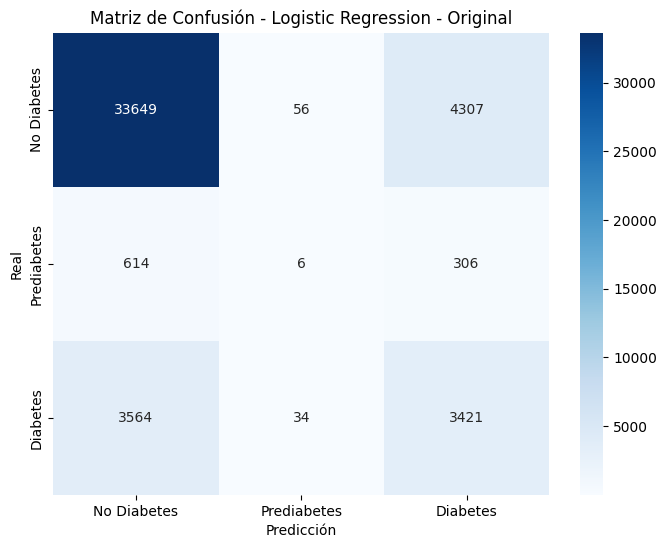


  Conjunto de entrenamiento: SMOTE
  Tiempo de entrenamiento: 5.72 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.67      0.78     38012
         1.0       0.03      0.27      0.06       926
         2.0       0.36      0.60      0.45      7019

    accuracy                           0.65     45957
   macro avg       0.45      0.51      0.43     45957
weighted avg       0.83      0.65      0.71     45957



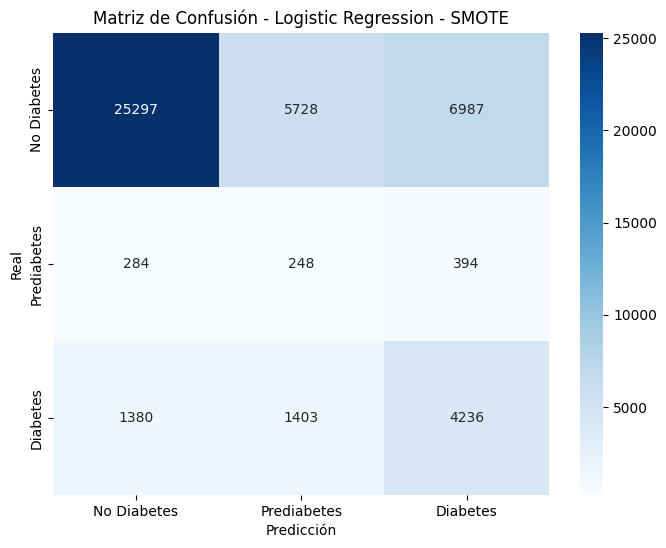


  Conjunto de entrenamiento: RUS
  Tiempo de entrenamiento: 0.12 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.67      0.78     38012
         1.0       0.03      0.25      0.06       926
         2.0       0.35      0.61      0.45      7019

    accuracy                           0.65     45957
   macro avg       0.44      0.51      0.43     45957
weighted avg       0.83      0.65      0.71     45957



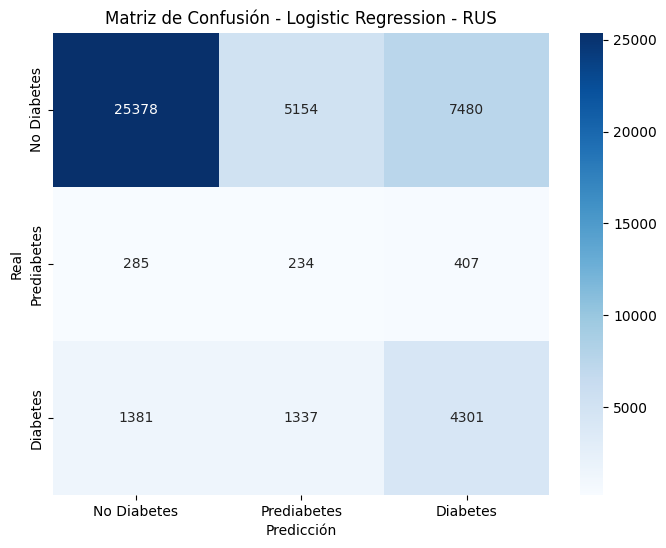


Resultados para Random Forest:

  Conjunto de entrenamiento: Original
  Tiempo de entrenamiento: 35.48 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90     38012
         1.0       0.01      0.00      0.00       926
         2.0       0.45      0.15      0.23      7019

    accuracy                           0.82     45957
   macro avg       0.44      0.37      0.38     45957
weighted avg       0.77      0.82      0.78     45957



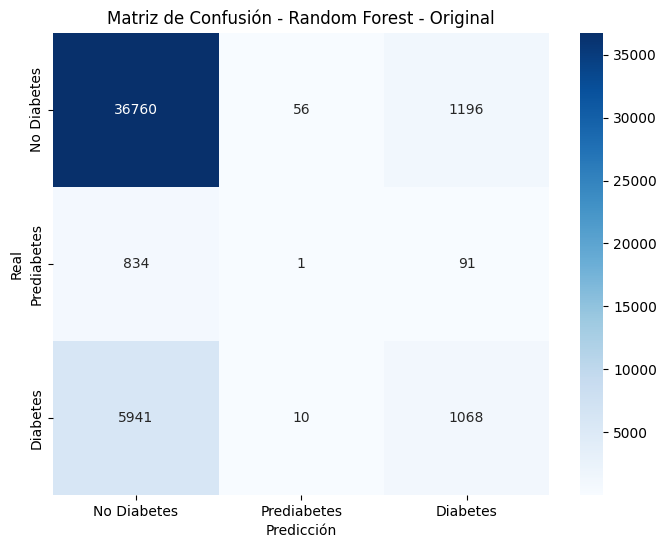


  Conjunto de entrenamiento: SMOTE
  Tiempo de entrenamiento: 204.50 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     38012
         1.0       0.02      0.00      0.01       926
         2.0       0.43      0.33      0.37      7019

    accuracy                           0.81     45957
   macro avg       0.44      0.42      0.42     45957
weighted avg       0.78      0.81      0.80     45957



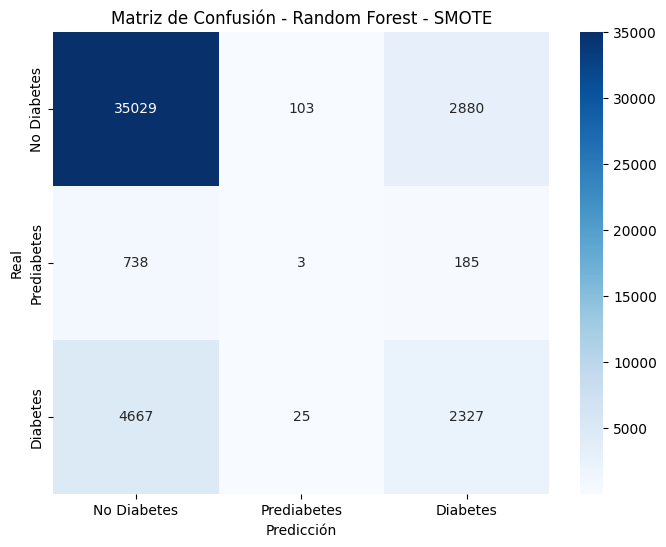


  Conjunto de entrenamiento: RUS
  Tiempo de entrenamiento: 2.14 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.58      0.72     38012
         1.0       0.03      0.34      0.05       926
         2.0       0.33      0.54      0.41      7019

    accuracy                           0.57     45957
   macro avg       0.43      0.49      0.40     45957
weighted avg       0.83      0.57      0.66     45957



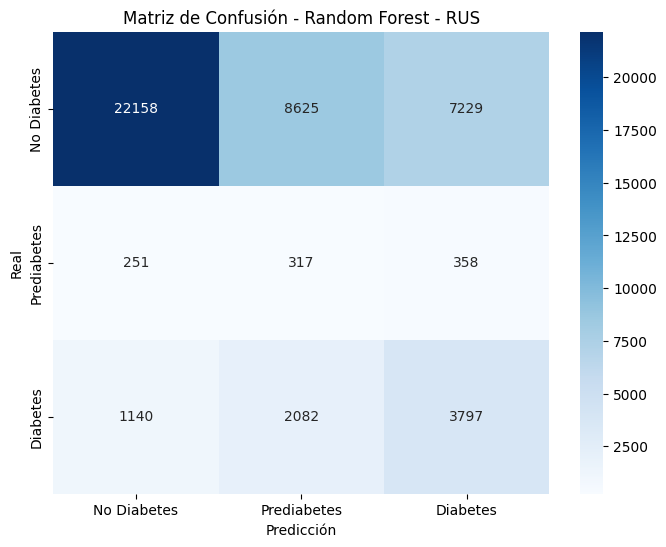


Resultados para Gradient Boosting:

  Conjunto de entrenamiento: Original
  Tiempo de entrenamiento: 99.07 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.59      0.20      0.30      7019

    accuracy                           0.84     45957
   macro avg       0.48      0.39      0.40     45957
weighted avg       0.79      0.84      0.80     45957



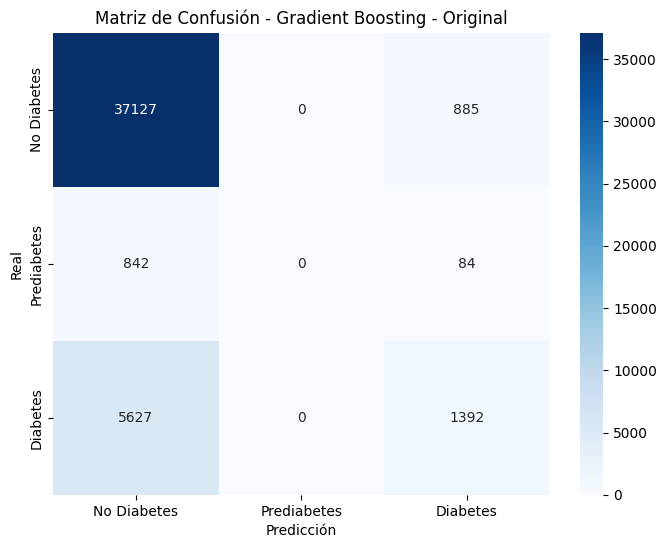


  Conjunto de entrenamiento: SMOTE
  Tiempo de entrenamiento: 730.13 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.42      0.51      0.46      7019

    accuracy                           0.81     45957
   macro avg       0.44      0.46      0.45     45957
weighted avg       0.80      0.81      0.80     45957



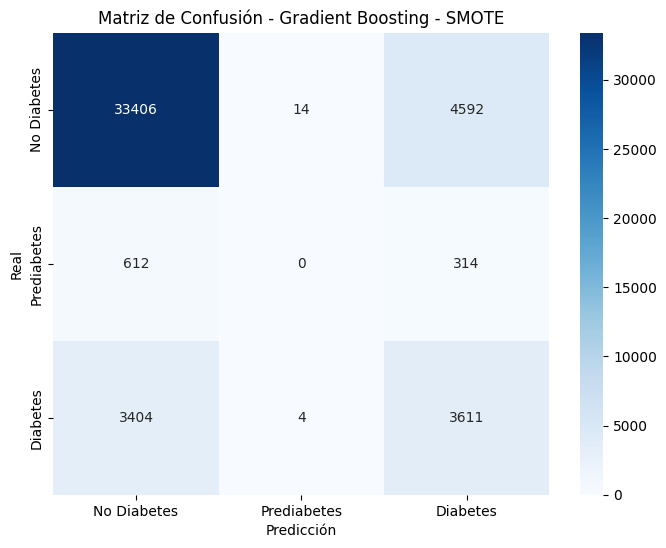


  Conjunto de entrenamiento: RUS
  Tiempo de entrenamiento: 5.91 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.61      0.74     38012
         1.0       0.03      0.34      0.06       926
         2.0       0.36      0.60      0.45      7019

    accuracy                           0.60     45957
   macro avg       0.45      0.52      0.42     45957
weighted avg       0.84      0.60      0.68     45957



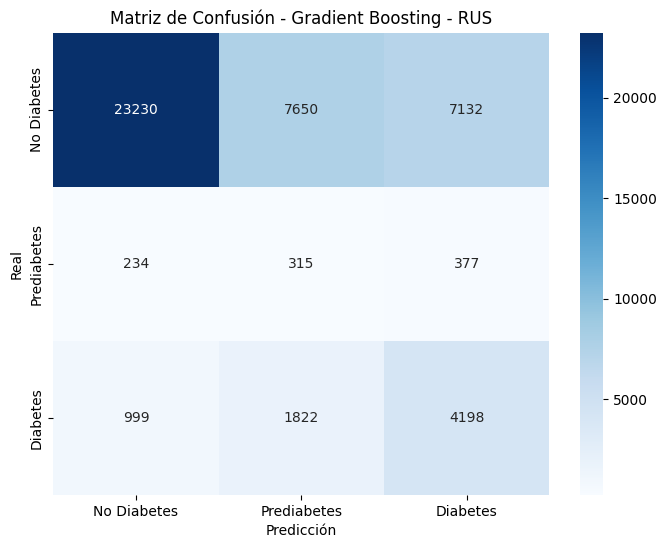

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time
import joblib # Necesario para cargar/guardar modelos y resultados
import os     # Necesario para rutas y directorios

# --- Configuración de persistencia para modelos y resultados ---
models_dir = 'trained_models' # O la ruta que prefieras
results_file = 'results_metrics.joblib'

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Cargar los resultados previos si existen
results = {}
if os.path.exists(results_file):
    try:
        results = joblib.load(results_file)
        print(f"Resultados previos cargados desde {results_file}")
    except Exception as e:
        print(f"Error al cargar resultados previos: {e}. Se inicializarán los resultados.")
        results = {}
else:
    print("No se encontraron resultados previos. Se inicializarán los resultados.")


# Modelos a entrenar (actualizado para reflejar la estrategia de orden)
normal_models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr', class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

linear_svc_model = {'LinearSVC': LinearSVC(random_state=42, class_weight='balanced', max_iter=10000)}

slow_svm_model = {'SVM': SVC(random_state=42, class_weight='balanced', probability=True)}


# Conjuntos de entrenamiento a utilizar (general para la mayoría de modelos)
train_sets_general = {
    'Original': (X_train_scaled, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'RUS': (X_train_rus, y_train_rus)
}

# Conjuntos de entrenamiento para SVM (solo Original y RUS)
train_sets_svm_limited = {
    'Original': (X_train_scaled, y_train),
    'RUS': (X_train_rus, y_train_rus)
}

# Asegurarse de que el diccionario de resultados tenga las claves de los modelos
results.update({name: {} for name in normal_models if name not in results})
results.update({name: {} for name in linear_svc_model if name not in results})
results.update({name: {} for name in slow_svm_model if name not in results})

# --- Entrenamiento de los modelos "normales" ---
for name, model_instance in normal_models.items(): # Cambiado 'model' a 'model_instance' para evitar confusión
    for set_name, (X_train_set, y_train_set) in train_sets_general.items():
        # Comprobar si el modelo para este set ya fue procesado y guardado
        if set_name in results[name] and 'classification_report' in results[name][set_name]:
            print(f"Saltando entrenamiento de {name} con datos {set_name} (ya procesado).")
            continue

        start_time = time.time()
        print(f"Entrenando {name} con datos {set_name}...")
        model_instance.fit(X_train_set, y_train_set)
        end_time = time.time()
        training_time = end_time - start_time
        print(f"Entrenamiento completado en {training_time:.2f} segundos.")

        y_pred = model_instance.predict(X_test_scaled)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        results[name][set_name] = {'classification_report': report, 'confusion_matrix': cm, 'training_time': training_time}

        # Guardar el modelo entrenado
        model_filename = os.path.join(models_dir, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}.joblib")
        joblib.dump(model_instance, model_filename)
        print(f"Modelo guardado: {model_filename}")

    joblib.dump(results, results_file)
    print(f"Resultados actuales guardados en {results_file}")

# --- Entrenamiento de LinearSVC ---
for name, model_instance in linear_svc_model.items():
    for set_name, (X_train_set, y_train_set) in train_sets_svm_limited.items():
        if set_name in results[name] and 'classification_report' in results[name][set_name]:
            print(f"Saltando entrenamiento de {name} con datos {set_name} (ya procesado).")
            continue

        start_time = time.time()
        print(f"Entrenando {name} con datos {set_name}...")
        model_instance.fit(X_train_set, y_train_set)
        end_time = time.time()
        training_time = end_time - start_time
        print(f"Entrenamiento completado en {training_time:.2f} segundos.")

        y_pred = model_instance.predict(X_test_scaled)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        results[name][set_name] = {'classification_report': report, 'confusion_matrix': cm, 'training_time': training_time}

        model_filename = os.path.join(models_dir, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}.joblib")
        joblib.dump(model_instance, model_filename)
        print(f"Modelo guardado: {model_filename}")

    joblib.dump(results, results_file)
    print(f"Resultados actuales guardados en {results_file}")

# --- Entrenamiento de SVC (el lento) ---
for name, model_instance in slow_svm_model.items():
    for set_name, (X_train_set, y_train_set) in train_sets_svm_limited.items():
        if set_name in results[name] and 'classification_report' in results[name][set_name]:
            print(f"Saltando entrenamiento de {name} con datos {set_name} (ya procesado).")
            continue

        start_time = time.time()
        print(f"Entrenando {name} con datos {set_name}...")
        model_instance.fit(X_train_set, y_train_set)
        end_time = time.time()
        training_time = end_time - start_time
        print(f"Entrenamiento completado en {training_time:.2f} segundos.")

        y_pred = model_instance.predict(X_test_scaled)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        results[name][set_name] = {'classification_report': report, 'confusion_matrix': cm, 'training_time': training_time}

        model_filename = os.path.join(models_dir, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}.joblib")
        joblib.dump(model_instance, model_filename)
        print(f"Modelo guardado: {model_filename}")

    joblib.dump(results, results_file)
    print(f"Resultados actuales guardados en {results_file}")


# --- Mostrar todos los resultados al final ---
print("\n--- RESUMEN DE TODOS LOS RESULTADOS DE LOS MODELOS ---")
for model_name, model_results in results.items():
    print(f"\nResultados para {model_name}:")
    for set_name, metrics in model_results.items():
        print(f"\n  Conjunto de entrenamiento: {set_name}")
        print("  Tiempo de entrenamiento:", f"{metrics['training_time']:.2f} segundos")
        print("  Classification Report:")
        print(metrics['classification_report'])
        plt.figure(figsize=(8, 6))
        sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                    yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
        plt.title(f'Matriz de Confusión - {model_name} - {set_name}')
        plt.xlabel('Predicción')
        plt.ylabel('Real')
        plt.show()

La clase 1 (prediabetes) presenta métricas muy bajas (precision, recall, f1-score) en todos los modelos y con las diferentes estrategias de balanceo. Esto sugiere que **la distinción entre la clase de prediabetes y las otras dos clases (no diabetes y diabetes) es intrínsecamente difícil para estos modelos con las características disponibles**.

Este podría deberse a varias razones:

* **La definición de prediabetes:** Puede que los indicadores de salud en el dataset no capturen de manera robusta las características que diferencian claramente la prediabetes de la ausencia de diabetes o de la diabetes establecida.
* **El tamaño de la muestra de prediabetes:** A pesar del sobremuestreo con SMOTE, la naturaleza intrínsecamente pequeña de esta clase en los datos originales podría limitar la capacidad del modelo para aprender patrones distintivos.
* **Solapamiento de características:** Es posible que los individuos con prediabetes compartan muchas características con aquellos sin diabetes o con diabetes, lo que dificulta la creación de límites de decisión claros por parte de los modelos.

A pesar de las dificultades con la clase de prediabetes, podemos observar algunas tendencias generales:

* **Modelos entrenados con el dataset original (desbalanceado):** Tienden a tener un buen rendimiento para la clase mayoritaria (no diabetes), con altos precision y recall. Sin embargo, el rendimiento para las clases minoritarias (prediabetes y diabetes) es muy pobre.
* **Modelos entrenados con SMOTE:** Generalmente muestran una mejora en el recall para la clase de diabetes, a costa de una disminución en la precisión para la clase de no diabetes. El rendimiento para la prediabetes sigue siendo bajo. El tiempo de entrenamiento con SMOTE es significativamente mayor, especialmente para Random Forest y Gradient Boosting debido al aumento en el tamaño del dataset.
* **Modelos entrenados con Random Under-Sampling (RUS):** Muestran un comportamiento similar a los modelos entrenados con SMOTE en términos de compromisos entre precisión y recall para las clases mayoritaria y diabetes. El tiempo de entrenamiento es mucho menor en comparación con SMOTE.

Dado este panorama, el siguiente paso lógico es **probar otros modelos de clasificación multiclase** para ver si alguno de ellos puede capturar mejor las sutilezas de la clase de prediabetes o mejorar el rendimiento general. Algunas familias de modelos que podríamos explorar incluyen:

* **Support Vector Machines (SVM):** Pueden ser efectivos en espacios de alta dimensión y con límites de decisión complejos.
* **K-Nearest Neighbors (KNN):** Un algoritmo no paramétrico que puede capturar relaciones no lineales en los datos.
* **Naive Bayes:** Un clasificador probabilístico simple que puede funcionar sorprendentemente bien en algunos casos.
* **Árboles de decisión y sus conjuntos (como XGBoost):** Pueden manejar relaciones no lineales y son robustos a la escala de las características.

Probaremos a entrenar estos modelos (SVM, KNN, Naive Bayes, y quizás XGBoost) utilizando los tres conjuntos de entrenamiento (original, SMOTE y RUS)? Esto nos dará una visión más amplia del rendimiento de diferentes algoritmos en este problema.

Vamos a entrenar los modelos: Support Vector Machines (SVM), K-Nearest Neighbors (KNN), Gaussian Naive Bayes, y XGBoost. Dada la naturaleza potencialmente no lineal de las relaciones en datos de salud, estos modelos podrían ofrecer perspectivas diferentes.

Aquí tienes el código para entrenar estos modelos con los tres conjuntos de entrenamiento (original, SMOTE y RUS). Ten en cuenta que el entrenamiento de SVM puede ser computacionalmente intensivo, especialmente con el conjunto de entrenamiento aumentado por SMOTE.


Después de ver los resultados de estos modelos adicionales, podemos evaluar si es necesario explorar estas técnicas de mejora. 

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Modelos adicionales a entrenar
additional_models = {
    'SVM': SVC(random_state=42, class_weight='balanced', probability=True), # probability=True para obtener probabilidades si es necesario
    'KNN': KNeighborsClassifier(n_neighbors=5), # Puedes ajustar el número de vecinos
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

# Conjuntos de entrenamiento a utilizar (definidos previamente)
train_sets = {
    'Original': (X_train_scaled, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'RUS': (X_train_rus, y_train_rus)
}

results.update({name: {} for name in additional_models}) # Asegurarse de que el diccionario de resultados esté actualizado

for name, model in additional_models.items():
    for set_name, (X_train_set, y_train_set) in train_sets.items():
        start_time = time.time()
        print(f"Entrenando {name} con datos {set_name}...")
        model.fit(X_train_set, y_train_set)
        end_time = time.time()
        training_time = end_time - start_time
        print(f"Entrenamiento completado en {training_time:.2f} segundos.")

        # Predicciones en el conjunto de prueba
        y_pred = model.predict(X_test_scaled)

        # Evaluación
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        results[name][set_name] = {'classification_report': report, 'confusion_matrix': cm, 'training_time': training_time}

# Mostrar los resultados de los nuevos modelos
for model_name, model_results in results.items():
    if model_name in additional_models:
        print(f"\nResultados para {model_name}:")
        for set_name, metrics in model_results.items():
            print(f"\n  Conjunto de entrenamiento: {set_name}")
            print("  Tiempo de entrenamiento:", f"{metrics['training_time']:.2f} segundos")
            print("  Classification Report:")
            print(metrics['classification_report'])
            plt.figure(figsize=(8, 6))
            sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                        xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                        yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
            plt.title(f'Matriz de Confusión - {model_name} - {set_name}')
            plt.xlabel('Predicción')
            plt.ylabel('Real')
            plt.show()

Entrenando SVM con datos Original...


Después de 532 minutos el entrenamiento de SVM con el conjunto de datos aumentado por SMOTE puede ser prohibitivamente largo debido a su complejidad computacional, que escala aproximadamente como $O(n^2)$ o $O(n^3)$ con el número de muestras $n$.

Dado este problema, es necesario realizar algunos cambios para que el proceso sea más viable. Aquí tienes algunas estrategias que podemos adoptar:

1.  **Reducir el tamaño del conjunto de entrenamiento para SVM:** Podemos probar a entrenar SVM solo con el conjunto de entrenamiento original (más pequeño) o con el conjunto balanceado por RUS, que también es significativamente menor que el generado por SMOTE.
2.  **Utilizar una versión más rápida de SVM:** `LinearSVC` es una implementación de SVM optimizada para grandes conjuntos de datos y es considerablemente más rápida, aunque solo funciona con kernels lineales. Podríamos probarlo.
3.  **Entrenar los otros modelos primero:** Mientras pensamos en una estrategia para SVM, podemos continuar entrenando KNN, Naive Bayes y XGBoost con los tres conjuntos de entrenamiento.

Vamos a implementar la primera y la tercera opción por ahora. Modificaré el código para entrenar SVM solo con los conjuntos 'Original' y 'RUS', y para continuar con el entrenamiento de los otros modelos con los tres conjuntos.


Ejecuta este código. Ahora, SVM se entrenará solo con los conjuntos 'Original' y 'RUS', y hemos añadido `LinearSVC` como una alternativa más rápida. Los otros modelos (KNN, Naive Bayes, XGBoost) se entrenarán con los tres conjuntos. Esto debería proporcionar resultados en un tiempo más razonable para la mayoría de los modelos. Comparte los resultados cuando estén listos.

#### **Snippet 1: Model Training (Todos los modelos excepto SVM) - Versión Mejorada**

Intentando cargar datos preprocesados...
Datos preprocesados cargados exitosamente.
Resultados previos cargados desde results_metrics.joblib

--- Iniciando/Revisando entrenamiento de modelos normales ---
Saltando entrenamiento de Logistic Regression con datos Original (ya procesado y guardado).
Saltando entrenamiento de Logistic Regression con datos SMOTE (ya procesado y guardado).
Saltando entrenamiento de Logistic Regression con datos RUS (ya procesado y guardado).
Resultados actuales guardados en results_metrics.joblib
Saltando entrenamiento de Random Forest con datos Original (ya procesado y guardado).
Saltando entrenamiento de Random Forest con datos SMOTE (ya procesado y guardado).
Saltando entrenamiento de Random Forest con datos RUS (ya procesado y guardado).
Resultados actuales guardados en results_metrics.joblib
Saltando entrenamiento de Gradient Boosting con datos Original (ya procesado y guardado).
Saltando entrenamiento de Gradient Boosting con datos SMOTE (ya procesado y 

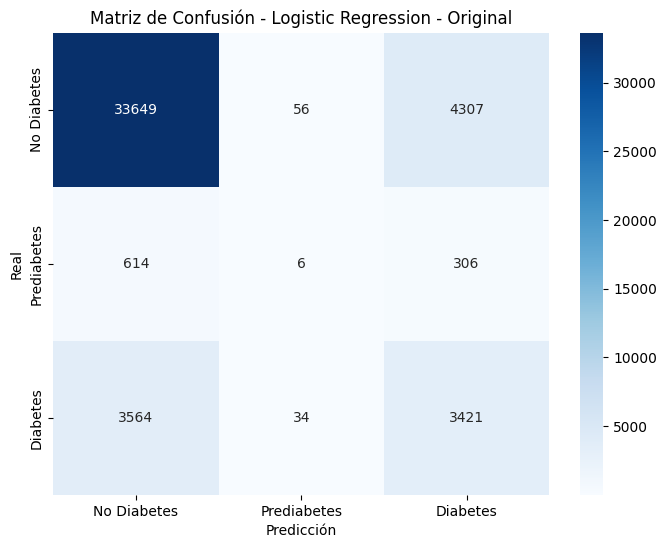


  Conjunto de entrenamiento: SMOTE
  Tiempo de entrenamiento: 5.68 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.67      0.78     38012
         1.0       0.03      0.27      0.06       926
         2.0       0.36      0.60      0.45      7019

    accuracy                           0.65     45957
   macro avg       0.45      0.51      0.43     45957
weighted avg       0.83      0.65      0.71     45957



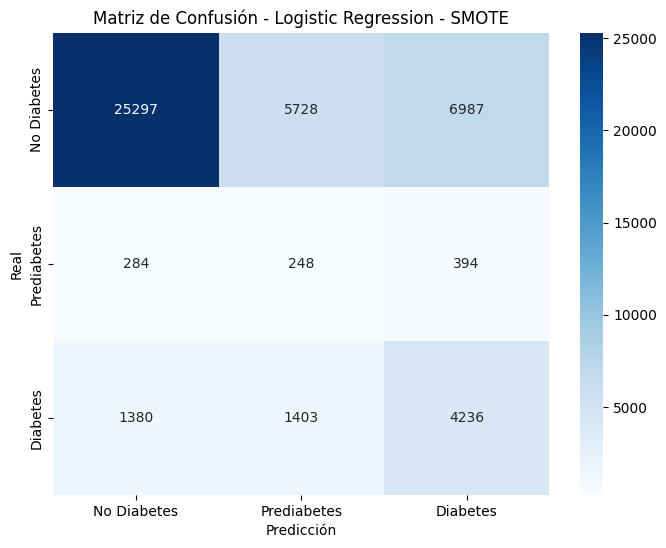


  Conjunto de entrenamiento: RUS
  Tiempo de entrenamiento: 0.10 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.67      0.78     38012
         1.0       0.03      0.25      0.06       926
         2.0       0.35      0.61      0.45      7019

    accuracy                           0.65     45957
   macro avg       0.44      0.51      0.43     45957
weighted avg       0.83      0.65      0.71     45957



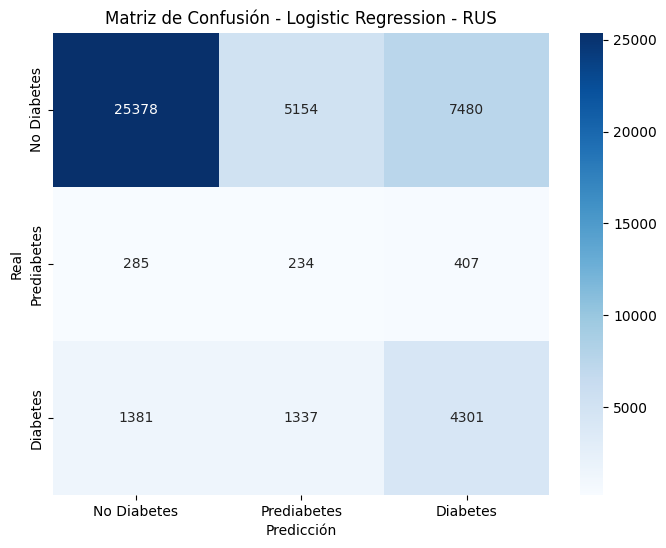


Resultados para Random Forest:

  Conjunto de entrenamiento: Original
  Tiempo de entrenamiento: 37.27 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90     38012
         1.0       0.01      0.00      0.00       926
         2.0       0.45      0.15      0.23      7019

    accuracy                           0.82     45957
   macro avg       0.44      0.37      0.38     45957
weighted avg       0.77      0.82      0.78     45957



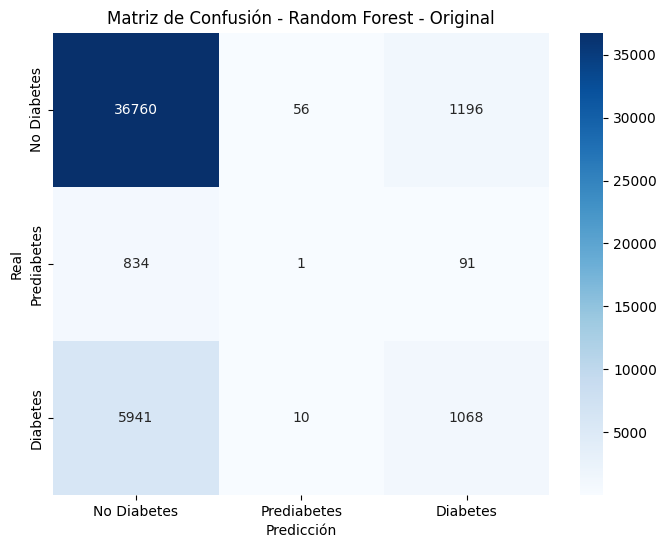


  Conjunto de entrenamiento: SMOTE
  Tiempo de entrenamiento: 162.70 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     38012
         1.0       0.02      0.00      0.01       926
         2.0       0.43      0.33      0.37      7019

    accuracy                           0.81     45957
   macro avg       0.44      0.42      0.42     45957
weighted avg       0.78      0.81      0.80     45957



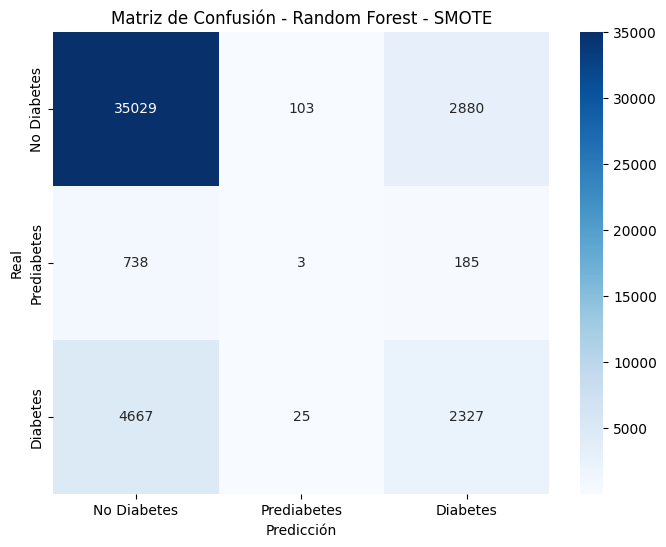


  Conjunto de entrenamiento: RUS
  Tiempo de entrenamiento: 1.70 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.58      0.72     38012
         1.0       0.03      0.34      0.05       926
         2.0       0.33      0.54      0.41      7019

    accuracy                           0.57     45957
   macro avg       0.43      0.49      0.40     45957
weighted avg       0.83      0.57      0.66     45957



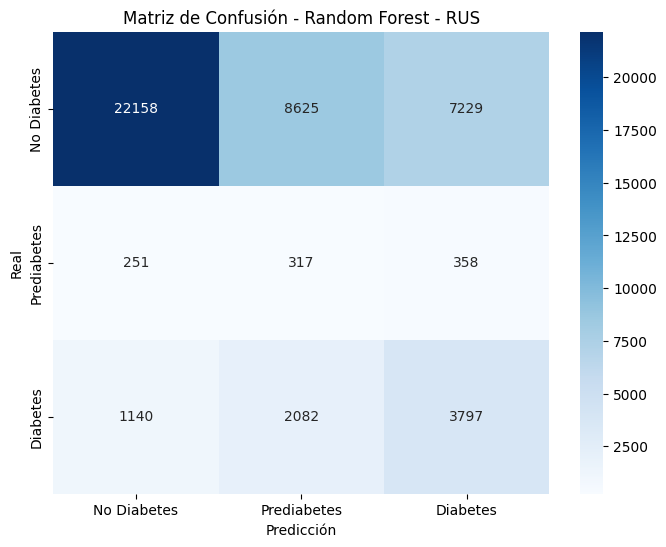


Resultados para Gradient Boosting:

  Conjunto de entrenamiento: Original
  Tiempo de entrenamiento: 86.01 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.59      0.20      0.30      7019

    accuracy                           0.84     45957
   macro avg       0.48      0.39      0.40     45957
weighted avg       0.79      0.84      0.80     45957



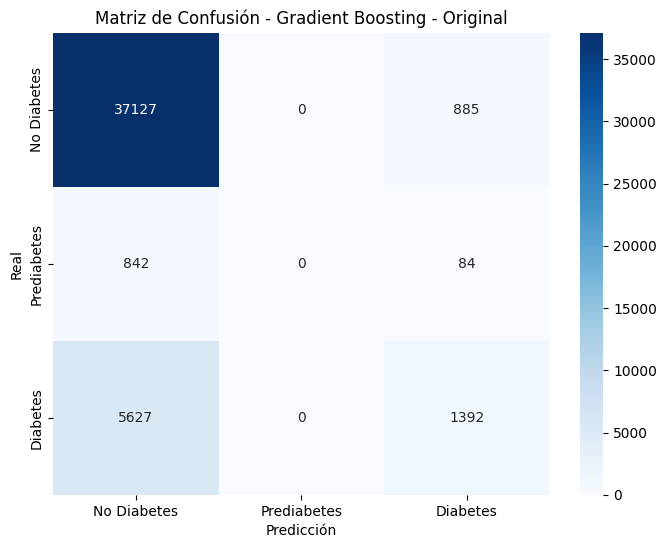


  Conjunto de entrenamiento: SMOTE
  Tiempo de entrenamiento: 568.38 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.42      0.51      0.46      7019

    accuracy                           0.81     45957
   macro avg       0.44      0.46      0.45     45957
weighted avg       0.80      0.81      0.80     45957



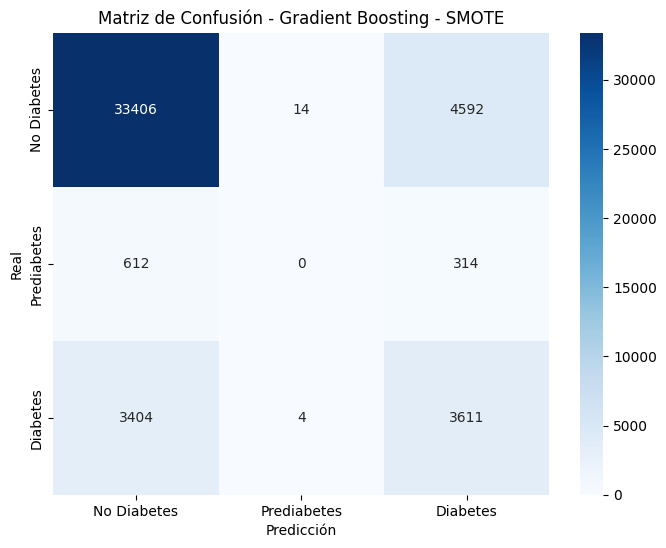


  Conjunto de entrenamiento: RUS
  Tiempo de entrenamiento: 3.17 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.61      0.74     38012
         1.0       0.03      0.34      0.06       926
         2.0       0.36      0.60      0.45      7019

    accuracy                           0.60     45957
   macro avg       0.45      0.52      0.42     45957
weighted avg       0.84      0.60      0.68     45957



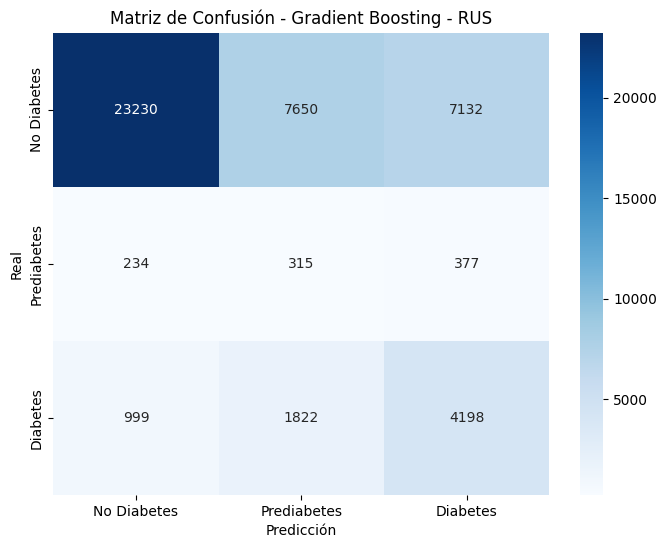


Resultados para KNN:

  Conjunto de entrenamiento: Original
  Tiempo de entrenamiento: 0.03 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     38012
         1.0       0.05      0.00      0.00       926
         2.0       0.41      0.21      0.27      7019

    accuracy                           0.82     45957
   macro avg       0.44      0.39      0.39     45957
weighted avg       0.77      0.82      0.78     45957



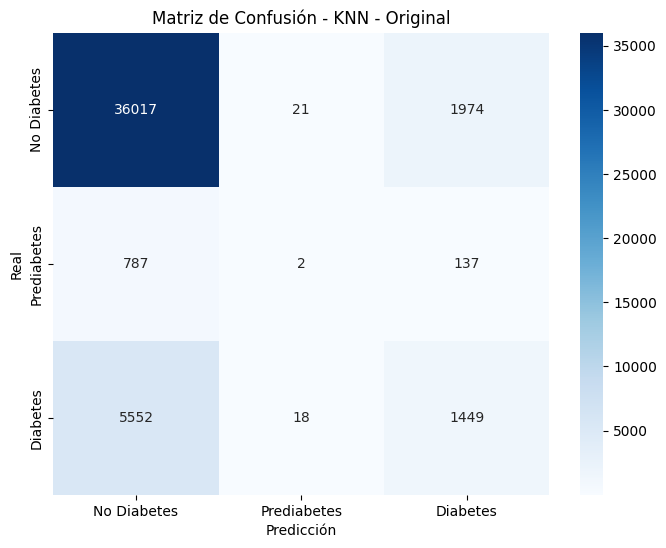


  Conjunto de entrenamiento: SMOTE
  Tiempo de entrenamiento: 0.04 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.66      0.76     38012
         1.0       0.03      0.12      0.05       926
         2.0       0.27      0.54      0.36      7019

    accuracy                           0.63     45957
   macro avg       0.40      0.44      0.39     45957
weighted avg       0.79      0.63      0.69     45957



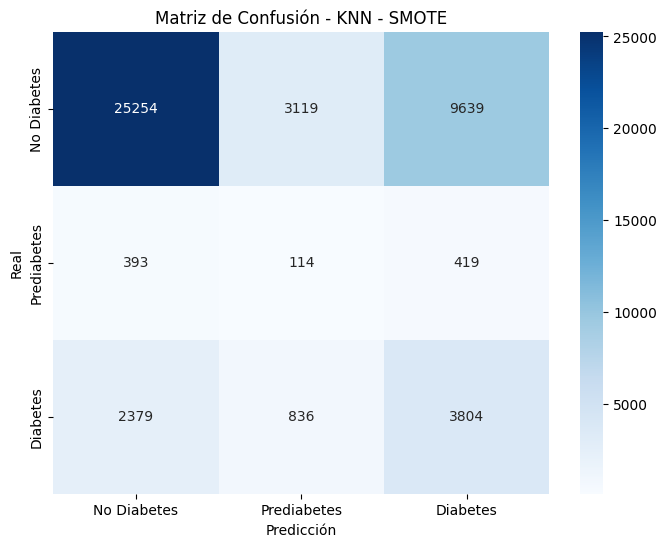


  Conjunto de entrenamiento: RUS
  Tiempo de entrenamiento: 0.00 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.59      0.72     38012
         1.0       0.03      0.35      0.05       926
         2.0       0.31      0.37      0.34      7019

    accuracy                           0.56     45957
   macro avg       0.41      0.44      0.37     45957
weighted avg       0.80      0.56      0.65     45957



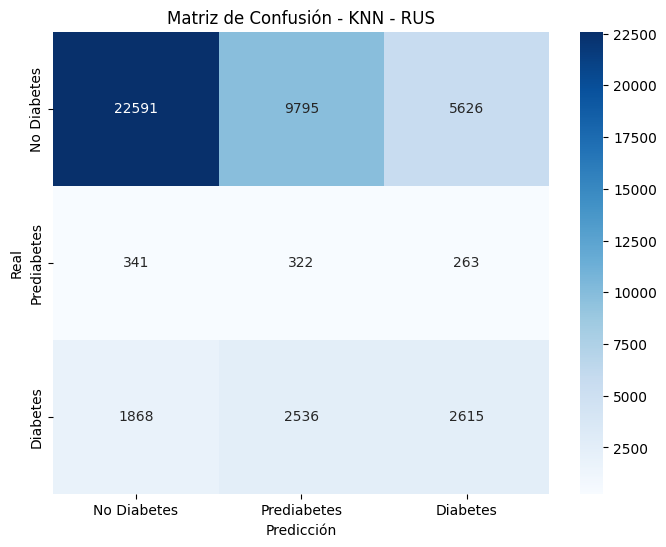


Resultados para Naive Bayes:

  Conjunto de entrenamiento: Original
  Tiempo de entrenamiento: 0.06 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84     38012
         1.0       0.04      0.01      0.02       926
         2.0       0.33      0.57      0.42      7019

    accuracy                           0.74     45957
   macro avg       0.42      0.46      0.43     45957
weighted avg       0.79      0.74      0.76     45957



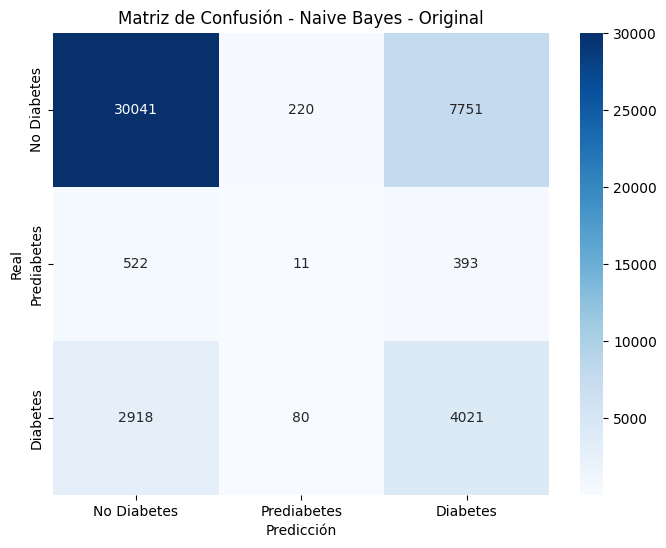


  Conjunto de entrenamiento: SMOTE
  Tiempo de entrenamiento: 0.15 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.64      0.76     38012
         1.0       0.03      0.21      0.05       926
         2.0       0.33      0.61      0.43      7019

    accuracy                           0.62     45957
   macro avg       0.43      0.49      0.41     45957
weighted avg       0.82      0.62      0.69     45957



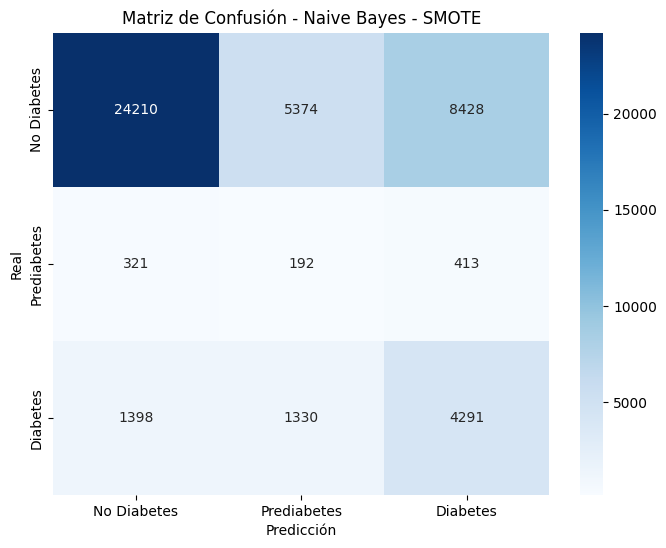


  Conjunto de entrenamiento: RUS
  Tiempo de entrenamiento: 0.00 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.65      0.76     38012
         1.0       0.03      0.08      0.04       926
         2.0       0.30      0.71      0.43      7019

    accuracy                           0.65     45957
   macro avg       0.42      0.48      0.41     45957
weighted avg       0.81      0.65      0.70     45957



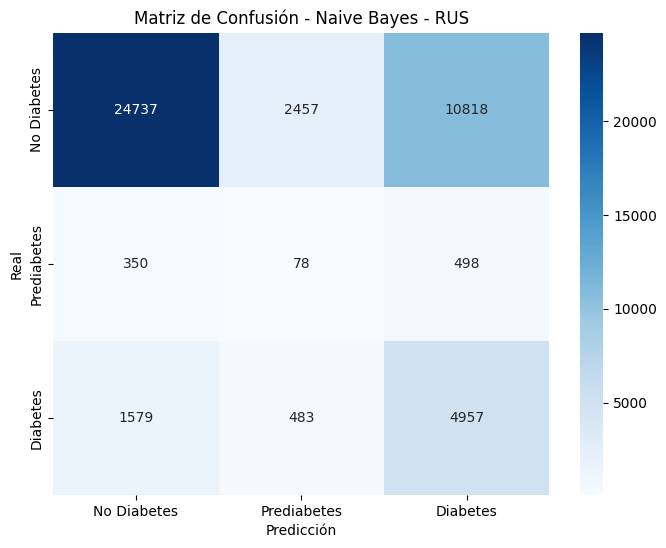


Resultados para XGBoost:

  Conjunto de entrenamiento: Original
  Tiempo de entrenamiento: 4.00 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.57      0.20      0.30      7019

    accuracy                           0.84     45957
   macro avg       0.47      0.39      0.40     45957
weighted avg       0.79      0.84      0.80     45957



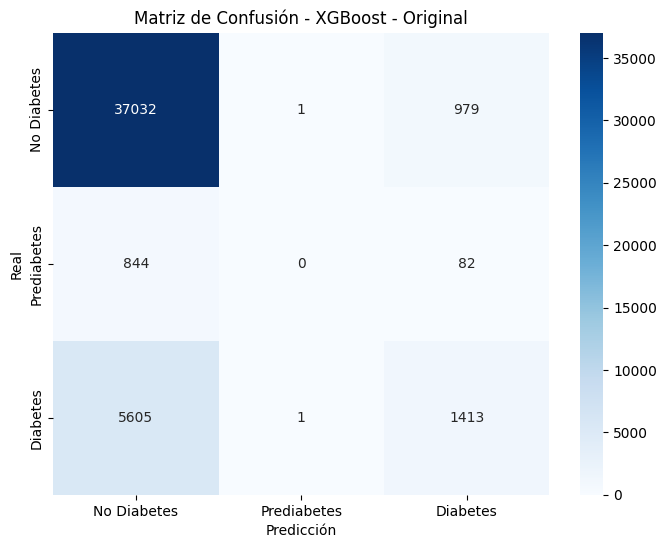


  Conjunto de entrenamiento: SMOTE
  Tiempo de entrenamiento: 10.91 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.54      0.25      0.34      7019

    accuracy                           0.84     45957
   macro avg       0.47      0.41      0.42     45957
weighted avg       0.79      0.84      0.80     45957



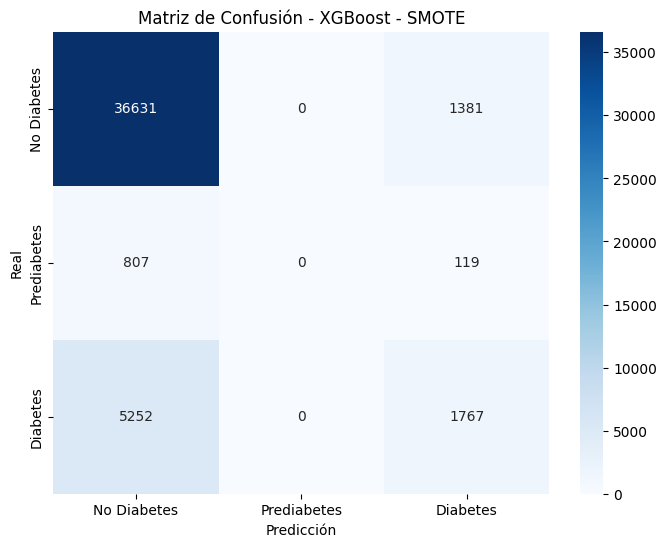


  Conjunto de entrenamiento: RUS
  Tiempo de entrenamiento: 0.46 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.58      0.72     38012
         1.0       0.03      0.36      0.05       926
         2.0       0.34      0.54      0.41      7019

    accuracy                           0.57     45957
   macro avg       0.44      0.49      0.40     45957
weighted avg       0.83      0.57      0.66     45957



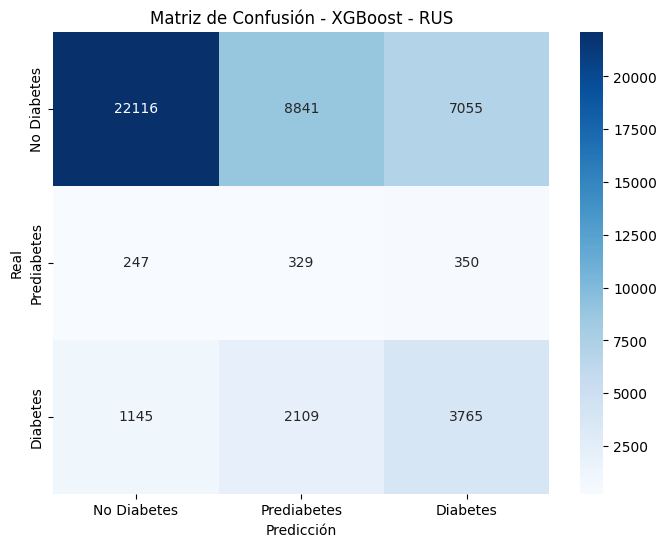

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC, LinearSVC # Excluido para este snippet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time
import joblib
import os
import pyarrow.parquet as pq # Para verificar la validez del archivo Parquet

# --- Configuración de persistencia para cargar datos ---
data_dir = '../data/processed_data' # Misma ruta que usaste para guardar los datos

# Nombres de archivo para los datasets (deben coincidir con cómo los guardaste)
X_train_scaled_path = os.path.join(data_dir, 'X_train_scaled.parquet')
X_test_scaled_path = os.path.join(data_dir, 'X_test_scaled.parquet')
y_train_path = os.path.join(data_dir, 'y_train.parquet')
y_test_path = os.path.join(data_dir, 'y_test.parquet')
X_train_smote_path = os.path.join(data_dir, 'X_train_smote.parquet')
y_train_smote_path = os.path.join(data_dir, 'y_train_smote.parquet')
X_train_rus_path = os.path.join(data_dir, 'X_train_rus.parquet')
y_train_rus_path = os.path.join(data_dir, 'y_train_rus.parquet')
scaler_path = os.path.join(data_dir, 'scaler.joblib')

# --- Función auxiliar para verificar la validez de los archivos Parquet ---
def is_valid_parquet(filepath):
    if not os.path.exists(filepath):
        return False
    if os.path.getsize(filepath) == 0:
        return False
    try:
        pq.read_metadata(filepath)
        return True
    except Exception as e:
        return False

# --- Cargar datos preprocesados ---
print("Intentando cargar datos preprocesados...")
try:
    if not (is_valid_parquet(X_train_scaled_path) and
            is_valid_parquet(X_test_scaled_path) and
            is_valid_parquet(y_train_path) and
            is_valid_parquet(y_test_path) and
            is_valid_parquet(X_train_smote_path) and
            is_valid_parquet(y_train_smote_path) and
            is_valid_parquet(X_train_rus_path) and
            is_valid_parquet(y_train_rus_path) and
            os.path.exists(scaler_path)):
        raise FileNotFoundError("Algunos archivos de datos preprocesados o el escalador no existen o están corruptos.")

    X_train_scaled = pd.read_parquet(X_train_scaled_path)
    X_test_scaled = pd.read_parquet(X_test_scaled_path)
    y_train = pd.read_parquet(y_train_path).squeeze()
    y_test = pd.read_parquet(y_test_path).squeeze()
    X_train_smote = pd.read_parquet(X_train_smote_path)
    y_train_smote = pd.read_parquet(y_train_smote_path).squeeze()
    X_train_rus = pd.read_parquet(X_train_rus_path)
    y_train_rus = pd.read_parquet(y_train_rus_path).squeeze()
    scaler = joblib.load(scaler_path)
    print("Datos preprocesados cargados exitosamente.")

except Exception as e:
    print(f"\nERROR: No se pudieron cargar todos los datos preprocesados. Por favor, asegúrate de haber ejecutado el script de preprocesamiento y persistencia y que los archivos estén en la ruta correcta: {data_dir}")
    print(f"Detalle del error: {e}")
    raise

# --- Configuración de persistencia para modelos y resultados ---
models_dir = 'trained_models'
results_file = 'results_metrics.joblib'

if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"Directorio de modelos creado: {models_dir}")

# Cargar los resultados previos si existen
results = {}
if os.path.exists(results_file):
    try:
        results = joblib.load(results_file)
        print(f"Resultados previos cargados desde {results_file}")
    except Exception as e:
        print(f"Error al cargar resultados previos: {e}. Se inicializarán los resultados.")
        results = {}
else:
    print("No se encontraron resultados previos. Se inicializarán los resultados.")

# Modelos a entrenar (excluyendo SVM y LinearSVC)
normal_models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr', class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

# Conjuntos de entrenamiento a utilizar
train_sets_general = {
    'Original': (X_train_scaled, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'RUS': (X_train_rus, y_train_rus)
}

# Asegurarse de que el diccionario de resultados tenga las claves de los modelos
# Esto es importante para que la visualización final incluya todos los modelos.
for name in normal_models:
    if name not in results:
        results[name] = {}


# --- Entrenamiento de los modelos "normales" ---
print("\n--- Iniciando/Revisando entrenamiento de modelos normales ---")
for name, model_instance in normal_models.items():
    for set_name, (X_train_set, y_train_set) in train_sets_general.items():
        # Verificar si los resultados ya existen para este modelo y conjunto
        if name in results and set_name in results[name] and 'classification_report' in results[name][set_name]:
            print(f"Saltando entrenamiento de {name} con datos {set_name} (ya procesado y guardado).")
            continue # Si ya está, salta el entrenamiento para esta combinación

        start_time = time.time()
        print(f"Entrenando {name} con datos {set_name}...")
        model_instance.fit(X_train_set, y_train_set)
        end_time = time.time()
        training_time = end_time - start_time
        print(f"Entrenamiento completado en {training_time:.2f} segundos.")

        y_pred = model_instance.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes']) # Añadir nombres de clases
        cm = confusion_matrix(y_test, y_pred)
        
        # Guardar resultados
        # Asegurarse de que el modelo esté en el diccionario results
        if name not in results:
            results[name] = {}
        results[name][set_name] = {'classification_report': report, 'confusion_matrix': cm, 'training_time': training_time}

        # Guardar el modelo
        model_filename = os.path.join(models_dir, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}.joblib")
        joblib.dump(model_instance, model_filename)
        print(f"Modelo guardado: {model_filename}")

    # Guardar los resultados actualizados después de cada modelo (para persistencia incremental)
    joblib.dump(results, results_file)
    print(f"Resultados actuales guardados en {results_file}")

print("\n--- Entrenamiento de modelos normales completado ---")

# --- Mostrar todos los resultados de los modelos entrenados/cargados en este snippet ---
print("\n--- RESUMEN DE RESULTADOS DE LOS MODELOS NORMALES ---")
for model_name, model_results in results.items():
    # Solo mostramos los resultados de los modelos definidos en 'normal_models'
    # para mantener la separación de los snippets.
    if model_name in normal_models:
        print(f"\nResultados para {model_name}:")
        for set_name, metrics in model_results.items():
            # Asegurarnos de que el conjunto de datos también está en los que usa este snippet
            if set_name in train_sets_general:
                print(f"\n  Conjunto de entrenamiento: {set_name}")
                print("  Tiempo de entrenamiento:", f"{metrics['training_time']:.2f} segundos")
                print("  Classification Report:")
                print(metrics['classification_report'])
                
                plt.figure(figsize=(8, 6))
                sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                            xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                            yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
                plt.title(f'Matriz de Confusión - {model_name} - {set_name}')
                plt.xlabel('Predicción')
                plt.ylabel('Real')
                plt.show()

#### **Snippet 2: Persistencia, Carga de Variables y Visualización de Resultados para SVM - Versión Mejorada**

In [ ]:
import pandas as pd
from sklearn.svm import SVC, LinearSVC # Específicamente para este snippet
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time
import joblib
import os
import pyarrow.parquet as pq # Para verificar la validez del archivo Parquet

# --- Configuración de persistencia para cargar datos ---
data_dir = '../data/processed_data' # Misma ruta que usaste para guardar los datos

# Nombres de archivo para los datasets (deben coincidir con cómo los guardaste)
X_train_scaled_path = os.path.join(data_dir, 'X_train_scaled.parquet')
X_test_scaled_path = os.path.join(data_dir, 'X_test_scaled.parquet')
y_train_path = os.path.join(data_dir, 'y_train.parquet')
y_test_path = os.path.join(data_dir, 'y_test.parquet')
X_train_smote_path = os.path.join(data_dir, 'X_train_smote.parquet')
y_train_smote_path = os.path.join(data_dir, 'y_train_smote.parquet')
X_train_rus_path = os.path.join(data_dir, 'X_train_rus.parquet')
y_train_rus_path = os.path.join(data_dir, 'y_train_rus.parquet')
scaler_path = os.path.join(data_dir, 'scaler.joblib')

# --- Función auxiliar para verificar la validez de los archivos Parquet ---
def is_valid_parquet(filepath):
    if not os.path.exists(filepath):
        return False
    if os.path.getsize(filepath) == 0:
        return False
    try:
        pq.read_metadata(filepath)
        return True
    except Exception as e:
        return False

# --- Cargar datos preprocesados (Necesarios para SVM) ---
print("Intentando cargar datos preprocesados para SVM y visualización...")
try:
    if not (is_valid_parquet(X_train_scaled_path) and
            is_valid_parquet(X_test_scaled_path) and
            is_valid_parquet(y_train_path) and
            is_valid_parquet(y_test_path) and
            is_valid_parquet(X_train_smote_path) and # SMOTE no se usa para SVM pero lo cargamos por consistencia
            is_valid_parquet(y_train_smote_path) and
            is_valid_parquet(X_train_rus_path) and
            is_valid_parquet(y_train_rus_path) and
            os.path.exists(scaler_path)):
        raise FileNotFoundError("Algunos archivos de datos preprocesados o el escalador no existen o están corruptos.")

    X_train_scaled = pd.read_parquet(X_train_scaled_path)
    X_test_scaled = pd.read_parquet(X_test_scaled_path)
    y_train = pd.read_parquet(y_train_path).squeeze()
    y_test = pd.read_parquet(y_test_path).squeeze()
    X_train_smote = pd.read_parquet(X_train_smote_path)
    y_train_smote = pd.read_parquet(y_train_smote_path).squeeze()
    X_train_rus = pd.read_parquet(X_train_rus_path)
    y_train_rus = pd.read_parquet(y_train_rus_path).squeeze()
    scaler = joblib.load(scaler_path)
    print("Datos preprocesados cargados exitosamente para SVM y visualización.")

except Exception as e:
    print(f"\nERROR: No se pudieron cargar todos los datos preprocesados. Por favor, asegúrate de haber ejecutado el script de preprocesamiento y persistencia y que los archivos estén en la ruta correcta: {data_dir}")
    print(f"Detalle del error: {e}")
    raise

# --- Configuración de persistencia para modelos y resultados ---
models_dir = 'trained_models'
results_file = 'results_metrics.joblib'

if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"Directorio de modelos creado: {models_dir}")

# Cargar los resultados previos (incluyendo los de los modelos entrenados en el primer snippet)
results = {}
if os.path.exists(results_file):
    try:
        results = joblib.load(results_file)
        print(f"Resultados previos cargados desde {results_file} para incluir SVM.")
    except Exception as e:
        print(f"Error al cargar resultados previos: {e}. Se inicializarán los resultados.")
        results = {}
else:
    print("No se encontraron resultados previos. Se inicializarán los resultados.")

# Modelos SVM a entrenar
linear_svc_model = {'LinearSVC': LinearSVC(random_state=42, class_weight='balanced', max_iter=10000)}
slow_svm_model = {'SVM': SVC(random_state=42, class_weight='balanced', probability=True)} # probability=True para ciertas métricas o si se necesita, aunque ralentiza.

# Conjuntos de entrenamiento para SVM (solo Original y RUS porque SMOTE es muy pesado para SVC)
train_sets_svm_limited = {
    'Original': (X_train_scaled, y_train),
    'RUS': (X_train_rus, y_train_rus)
}

# Asegurarse de que el diccionario de resultados tenga las claves de los modelos SVM
for name in linear_svc_model:
    if name not in results:
        results[name] = {}
for name in slow_svm_model:
    if name not in results:
        results[name] = {}

# --- Entrenamiento de LinearSVC ---
print("\n--- Iniciando/Revisando entrenamiento de LinearSVC ---")
for name, model_instance in linear_svc_model.items():
    for set_name, (X_train_set, y_train_set) in train_sets_svm_limited.items():
        if name in results and set_name in results[name] and 'classification_report' in results[name][set_name]:
            print(f"Saltando entrenamiento de {name} con datos {set_name} (ya procesado y guardado).")
            continue

        start_time = time.time()
        print(f"Entrenando {name} con datos {set_name}...")
        model_instance.fit(X_train_set, y_train_set)
        end_time = time.time()
        training_time = end_time - start_time
        print(f"Entrenamiento completado en {training_time:.2f} segundos.")

        y_pred = model_instance.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes']) # Añadir nombres de clases
        cm = confusion_matrix(y_test, y_pred)
        
        if name not in results:
            results[name] = {}
        results[name][set_name] = {'classification_report': report, 'confusion_matrix': cm, 'training_time': training_time}

        model_filename = os.path.join(models_dir, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}.joblib")
        joblib.dump(model_instance, model_filename)
        print(f"Modelo guardado: {model_filename}")

    joblib.dump(results, results_file)
    print(f"Resultados actuales (LinearSVC) guardados en {results_file}")

# --- Entrenamiento de SVC (el lento) ---
print("\n--- Iniciando/Revisando entrenamiento de SVC (puede ser muy lento) ---")
for name, model_instance in slow_svm_model.items():
    for set_name, (X_train_set, y_train_set) in train_sets_svm_limited.items():
        if name in results and set_name in results[name] and 'classification_report' in results[name][set_name]:
            print(f"Saltando entrenamiento de {name} con datos {set_name} (ya procesado y guardado).")
            continue

        start_time = time.time()
        print(f"Entrenando {name} con datos {set_name}...")
        model_instance.fit(X_train_set, y_train_set)
        end_time = time.time()
        training_time = end_time - start_time
        print(f"Entrenamiento completado en {training_time:.2f} segundos.")

        y_pred = model_instance.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes']) # Añadir nombres de clases
        cm = confusion_matrix(y_test, y_pred)
        
        if name not in results:
            results[name] = {}
        results[name][set_name] = {'classification_report': report, 'confusion_matrix': cm, 'training_time': training_time}

        model_filename = os.path.join(models_dir, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}.joblib")
        joblib.dump(model_instance, model_filename)
        print(f"Modelo guardado: {model_filename}")

    joblib.dump(results, results_file)
    print(f"Resultados actuales (SVC) guardados en {results_file}")


# --- Mostrar resultados de los modelos SVM (LinearSVC y SVC) ---
# Primero, combinamos los diccionarios de modelos para facilitar la iteración
svm_models_to_show = {**linear_svc_model, **slow_svm_model}

print("\n--- RESUMEN DE RESULTADOS DE LOS MODELOS SVM ---")
for model_name, _ in svm_models_to_show.items():
    if model_name in results: # Asegurarse de que el modelo esté en los resultados cargados
        print(f"\nResultados para {model_name}:")
        for set_name, metrics in results[model_name].items():
            # Asegurarse de que el conjunto de datos también está en los que usa este snippet para SVM
            if set_name in train_sets_svm_limited:
                print(f"\n  Conjunto de entrenamiento: {set_name}")
                print("  Tiempo de entrenamiento:", f"{metrics['training_time']:.2f} segundos")
                print("  Classification Report:")
                print(metrics['classification_report'])
                
                # Visualización de la Matriz de Confusión
                plt.figure(figsize=(8, 6))
                sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                            xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                            yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
                plt.title(f'Matriz de Confusión - {model_name} - {set_name}')
                plt.xlabel('Predicción')
                plt.ylabel('Real')
                plt.show()

Es un paso muy importante para abordar el desequilibrio de clases.

Antes de darte el código, aclaremos la duda:

### ¿Cuándo se realiza el muestreo o remuestreo: qué es?

El **muestreo** o **remuestreo** (en el contexto de Machine Learning para desequilibrio de clases) se refiere a las técnicas utilizadas para modificar la distribución de clases en un dataset de entrenamiento. Su objetivo principal es hacer que las clases minoritarias sean más "visibles" para el algoritmo de aprendizaje, evitando que la clase mayoritaria domine el proceso de entrenamiento y que el modelo ignore las clases con menos ejemplos.

Se realiza **después de la división de los datos en conjuntos de entrenamiento y prueba (train-test split), y generalmente después del escalado de características, pero siempre y únicamente sobre el conjunto de entrenamiento**. Nunca se debe aplicar remuestreo al conjunto de prueba, ya que esto introduciría un sesgo en la evaluación del rendimiento del modelo en datos no vistos.

Hay dos tipos principales de remuestreo:

1.  **Sobremuestreo (Oversampling):** Consiste en aumentar el número de ejemplos de la clase minoritaria.

      * **Ejemplos:**
          * **Sobremuestreo aleatorio:** Duplicar aleatoriamente ejemplos de la clase minoritaria. Es simple, pero puede llevar a sobreajuste.
          * **SMOTE (Synthetic Minority Over-sampling Technique):** Crea nuevas muestras sintéticas de la clase minoritaria interpolando entre ejemplos existentes de esa clase. Es más sofisticado y reduce el riesgo de sobreajuste comparado con el sobremuestreo aleatorio.

2.  **Submuestreo (Undersampling):** Consiste en reducir el número de ejemplos de la clase mayoritaria.

      * **Ejemplos:**
          * **Submuestreo aleatorio (Random Under-Sampling - RUS):** Eliminar aleatoriamente ejemplos de la clase mayoritaria. Puede ser útil para reducir drásticamente el tamaño del dataset, pero existe el riesgo de perder información valiosa de la clase mayoritaria.
          * **Edited Nearest Neighbours (ENN):** Elimina ejemplos de la clase mayoritaria que son "mal clasificados" por sus vecinos más cercanos.
          * **Tomek Links:** Identifica pares de muestras de clases opuestas que son muy cercanas entre sí (consideradas "enlaces Tomek") y elimina la muestra de la clase mayoritaria de ese par.

3.  **Remuestreo Híbrido:** Combinan técnicas de sobremuestreo y submuestreo para obtener un equilibrio.

      * **Ejemplos:**
          * **SMOTE-ENN:** Aplica SMOTE y luego ENN. La idea es que SMOTE crea nuevas muestras minoritarias y ENN luego "limpia" el dataset eliminando muestras ruidosas o superpuestas de ambas clases que son "mal clasificadas" por sus vecinos.
          * **SMOTE-Tomek:** Aplica SMOTE y luego elimina los enlaces Tomek. Esto ayuda a limpiar la frontera de decisión.

-----

### Código para Implementar SMOTE-ENN y SMOTE-Tomek

Necesitarás instalar la biblioteca `imbalanced-learn`.

```bash
pip install imbalanced-learn
```

A continuación, te doy el código para incorporar SMOTE-ENN y SMOTE-Tomek en tu proceso de remuestreo. Integraré esto en el primer snippet que ya tienes para los modelos "normales".

Vamos a modificar la parte donde se definen los `train_sets_general` para incluir los datasets remuestreados con estas técnicas.


**Puntos Clave de la Modificación:**

1.  **Importaciones:** Se añaden `SMOTEENN`, `SMOTETomek`, `SMOTE` y `RandomUnderSampler` de `imblearn`.
2.  **Generación de Nuevos Datasets:**
      * Después de cargar tus datos originales (`X_train_scaled`, `y_train`), se crean nuevas variables `X_train_smoteenn`, `y_train_smoteenn` y `X_train_smotetomek`, `y_train_smotetomek` aplicando las respectivas técnicas híbridas.
      * Se imprimen las formas y los conteos de clases de los nuevos datasets para que puedas ver cómo ha cambiado la distribución.
3.  **Actualización de `train_sets_general`:** Ahora este diccionario incluye las claves `'SMOTE-ENN'` y `'SMOTE-Tomek'` con sus respectivos datasets.
4.  **Flujo de Entrenamiento:** El bucle de entrenamiento de modelos no cambia, pero ahora iterará también sobre estos nuevos conjuntos de entrenamiento. La lógica de saltar si ya está procesado sigue funcionando.
5.  **Visualización:** La parte de visualización final también iterará sobre estos nuevos conjuntos de resultados.

**¿Cómo continuar?**

1.  **Ejecuta este código.** Observa el tiempo de entrenamiento para cada modelo con los nuevos datasets híbridos y, lo más importante, analiza detenidamente los nuevos `classification_report` y las matrices de confusión, prestando **mucha atención a la fila y columna de 'Prediabetes'**.
2.  **Compara:** ¿Han mejorado las métricas (precision, recall, f1-score) para la clase "Prediabetes" con SMOTE-ENN y SMOTE-Tomek en comparación con "Original", "SMOTE" y "RUS"?
3.  **Identifica los "mejores":** Anota qué modelo(s) y qué técnica de remuestreo (incluyendo los anteriores) ofrecen los resultados más prometedores para la clase "Prediabetes".
4.  Si los resultados aún no son satisfactorios, el siguiente paso sería el **Ajuste de Hiperparámetros** de los modelos más prometedores, como se discutió anteriormente, utilizando métricas de scoring que prioricen la detección de la clase minoritaria.

Intentando cargar datos preprocesados...
Datos preprocesados cargados exitosamente.
Resultados previos cargados desde results_metrics.joblib

Aplicando técnicas de remuestreo híbridas (SMOTE-ENN y SMOTE-Tomek)...
Dataset SMOTE-ENN: X_train_smoteenn.shape=(365609, 21), y_train_smoteenn.shape=(365609,)
Conteo de clases SMOTE-ENN:
Diabetes_012
1.0    148037
2.0    130108
0.0     87464
Name: count, dtype: int64
Dataset SMOTE-Tomek: X_train_smotetomek.shape=(451761, 21), y_train_smotetomek.shape=(451761,)
Conteo de clases SMOTE-Tomek:
Diabetes_012
1.0    151796
2.0    150022
0.0    149943
Name: count, dtype: int64

--- Iniciando/Revisando entrenamiento de modelos normales ---
Saltando entrenamiento de Logistic Regression con datos Original (ya procesado y guardado).
Saltando entrenamiento de Logistic Regression con datos SMOTE (ya procesado y guardado).
Saltando entrenamiento de Logistic Regression con datos RUS (ya procesado y guardado).
Entrenando Logistic Regression con datos SMOTE-ENN..

/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Entrenamiento completado en 3.44 segundos.
Modelo guardado: trained_models/Logistic_Regression_SMOTE-ENN.joblib
Entrenando Logistic Regression con datos SMOTE-Tomek...


/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Entrenamiento completado en 4.86 segundos.
Modelo guardado: trained_models/Logistic_Regression_SMOTE-Tomek.joblib
Resultados actuales guardados en results_metrics.joblib
Saltando entrenamiento de Random Forest con datos Original (ya procesado y guardado).
Saltando entrenamiento de Random Forest con datos SMOTE (ya procesado y guardado).
Saltando entrenamiento de Random Forest con datos RUS (ya procesado y guardado).
Entrenando Random Forest con datos SMOTE-ENN...
Entrenamiento completado en 130.03 segundos.
Modelo guardado: trained_models/Random_Forest_SMOTE-ENN.joblib
Entrenando Random Forest con datos SMOTE-Tomek...
Entrenamiento completado en 162.09 segundos.
Modelo guardado: trained_models/Random_Forest_SMOTE-Tomek.joblib
Resultados actuales guardados en results_metrics.joblib
Saltando entrenamiento de Gradient Boosting con datos Original (ya procesado y guardado).
Saltando entrenamiento de Gradient Boosting con datos SMOTE (ya procesado y guardado).
Saltando entrenamiento de Gradi

/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:52:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Entrenamiento completado en 14.00 segundos.
Modelo guardado: trained_models/XGBoost_SMOTE-ENN.joblib
Entrenando XGBoost con datos SMOTE-Tomek...


/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:52:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Entrenamiento completado en 19.99 segundos.
Modelo guardado: trained_models/XGBoost_SMOTE-Tomek.joblib
Resultados actuales guardados en results_metrics.joblib

--- Entrenamiento de modelos normales completado ---

--- RESUMEN DE RESULTADOS DE LOS MODELOS NORMALES ---

Resultados para Logistic Regression:

  Conjunto de entrenamiento: Original
  Tiempo de entrenamiento: 2.73 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89     38012
         1.0       0.06      0.01      0.01       926
         2.0       0.43      0.49      0.45      7019

    accuracy                           0.81     45957
   macro avg       0.46      0.46      0.45     45957
weighted avg       0.80      0.81      0.80     45957



/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

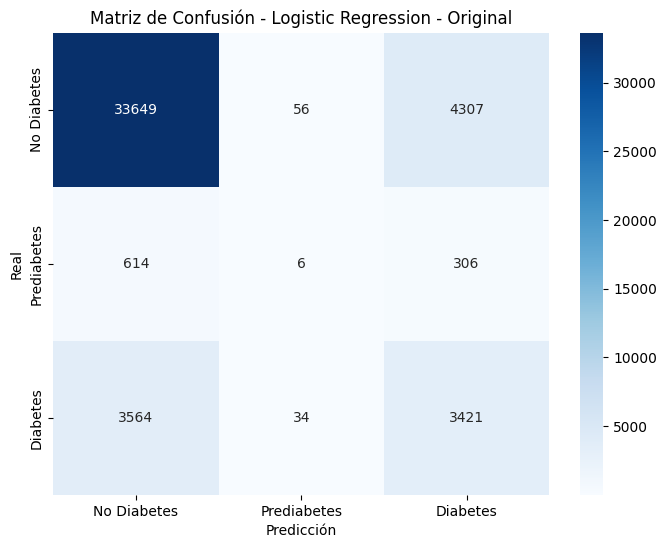


  Conjunto de entrenamiento: SMOTE
  Tiempo de entrenamiento: 5.68 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.67      0.78     38012
         1.0       0.03      0.27      0.06       926
         2.0       0.36      0.60      0.45      7019

    accuracy                           0.65     45957
   macro avg       0.45      0.51      0.43     45957
weighted avg       0.83      0.65      0.71     45957



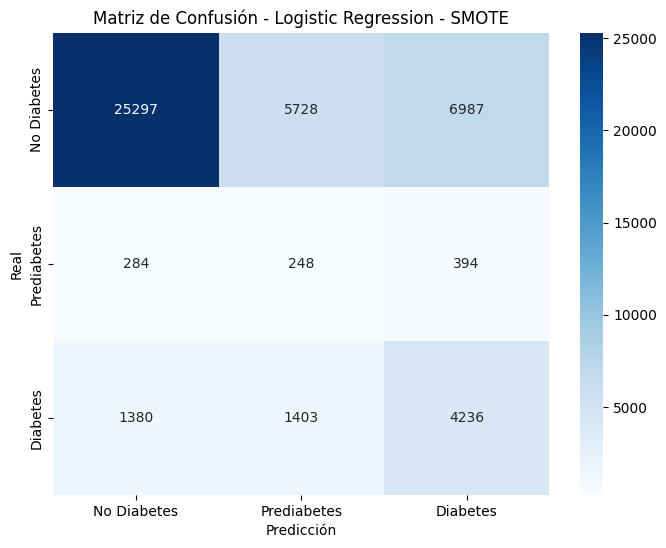


  Conjunto de entrenamiento: RUS
  Tiempo de entrenamiento: 0.10 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.67      0.78     38012
         1.0       0.03      0.25      0.06       926
         2.0       0.35      0.61      0.45      7019

    accuracy                           0.65     45957
   macro avg       0.44      0.51      0.43     45957
weighted avg       0.83      0.65      0.71     45957



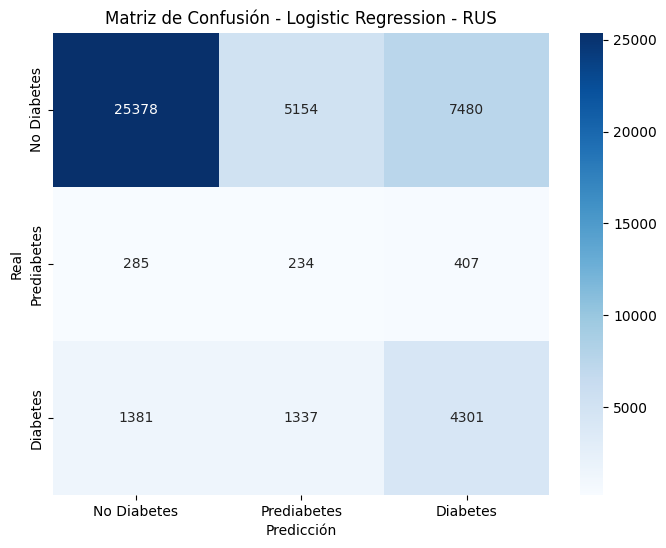


  Conjunto de entrenamiento: SMOTE-ENN
  Tiempo de entrenamiento: 3.44 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.96      0.57      0.72     38012
 Prediabetes       0.03      0.38      0.05       926
    Diabetes       0.36      0.57      0.44      7019

    accuracy                           0.57     45957
   macro avg       0.45      0.51      0.40     45957
weighted avg       0.85      0.57      0.66     45957



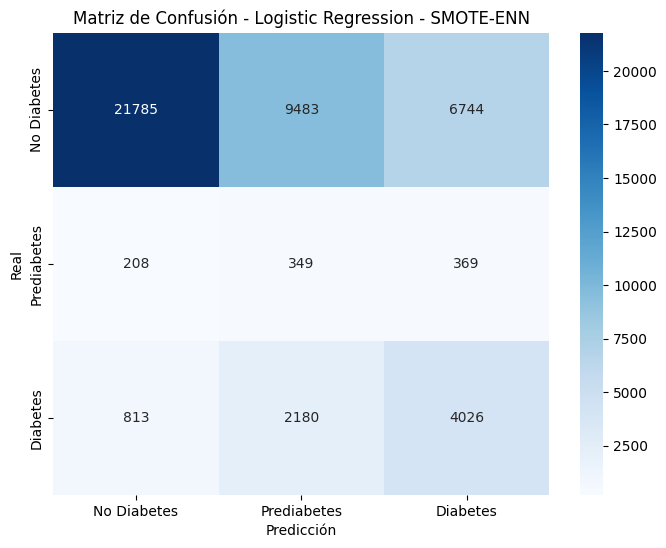


  Conjunto de entrenamiento: SMOTE-Tomek
  Tiempo de entrenamiento: 4.86 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.94      0.66      0.78     38012
 Prediabetes       0.03      0.27      0.06       926
    Diabetes       0.37      0.60      0.45      7019

    accuracy                           0.65     45957
   macro avg       0.45      0.51      0.43     45957
weighted avg       0.83      0.65      0.71     45957



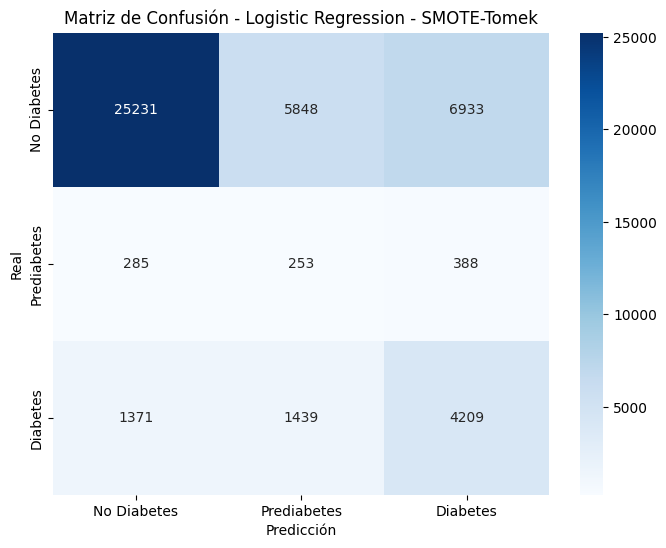


Resultados para Random Forest:

  Conjunto de entrenamiento: Original
  Tiempo de entrenamiento: 37.27 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90     38012
         1.0       0.01      0.00      0.00       926
         2.0       0.45      0.15      0.23      7019

    accuracy                           0.82     45957
   macro avg       0.44      0.37      0.38     45957
weighted avg       0.77      0.82      0.78     45957



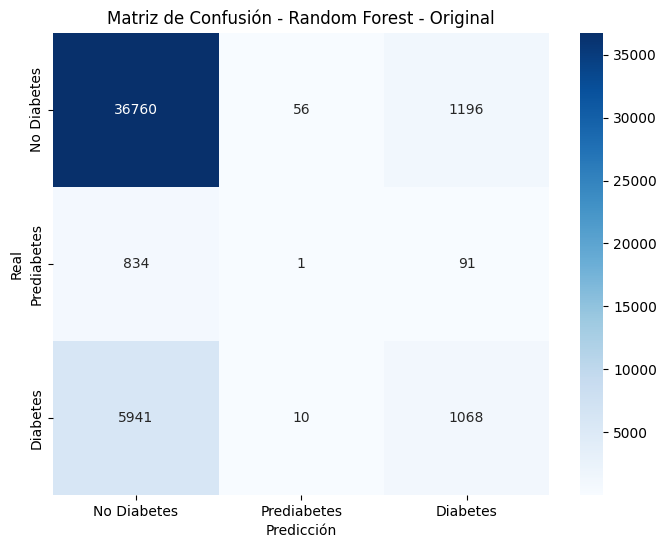


  Conjunto de entrenamiento: SMOTE
  Tiempo de entrenamiento: 162.70 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     38012
         1.0       0.02      0.00      0.01       926
         2.0       0.43      0.33      0.37      7019

    accuracy                           0.81     45957
   macro avg       0.44      0.42      0.42     45957
weighted avg       0.78      0.81      0.80     45957



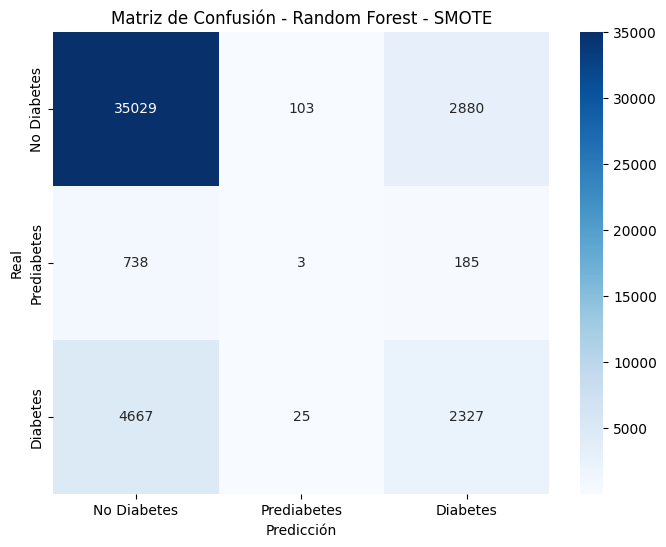


  Conjunto de entrenamiento: RUS
  Tiempo de entrenamiento: 1.70 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.58      0.72     38012
         1.0       0.03      0.34      0.05       926
         2.0       0.33      0.54      0.41      7019

    accuracy                           0.57     45957
   macro avg       0.43      0.49      0.40     45957
weighted avg       0.83      0.57      0.66     45957



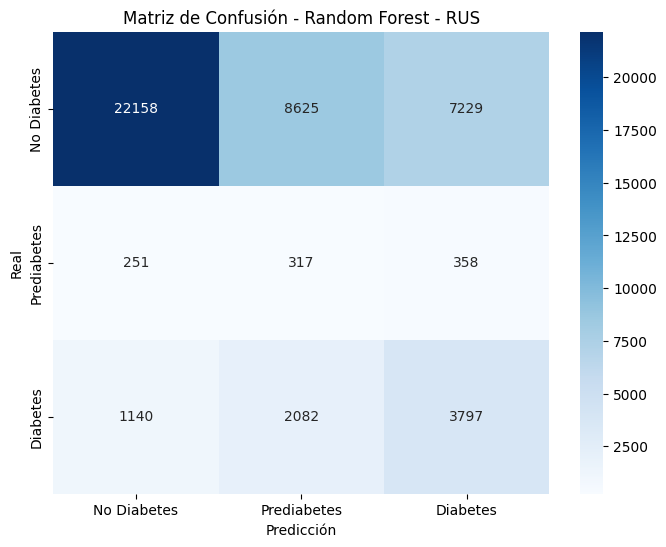


  Conjunto de entrenamiento: SMOTE-ENN
  Tiempo de entrenamiento: 130.03 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.92      0.76      0.83     38012
 Prediabetes       0.03      0.02      0.02       926
    Diabetes       0.34      0.69      0.46      7019

    accuracy                           0.74     45957
   macro avg       0.43      0.49      0.44     45957
weighted avg       0.81      0.74      0.76     45957



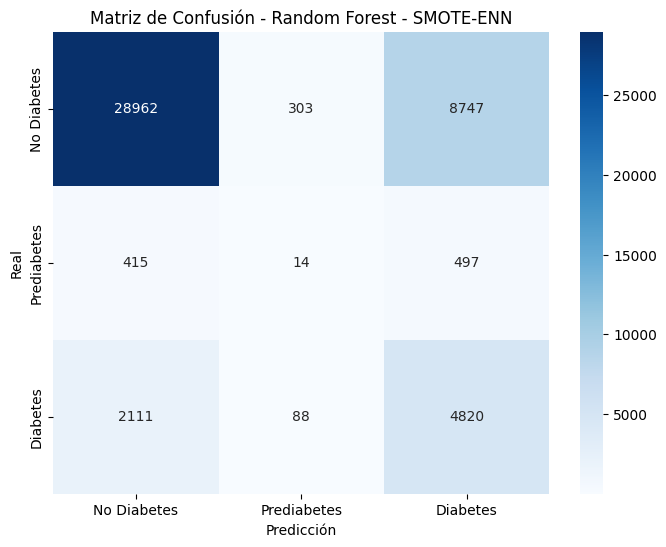


  Conjunto de entrenamiento: SMOTE-Tomek
  Tiempo de entrenamiento: 162.09 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.87      0.92      0.89     38012
 Prediabetes       0.03      0.00      0.01       926
    Diabetes       0.43      0.34      0.38      7019

    accuracy                           0.81     45957
   macro avg       0.44      0.42      0.43     45957
weighted avg       0.78      0.81      0.80     45957



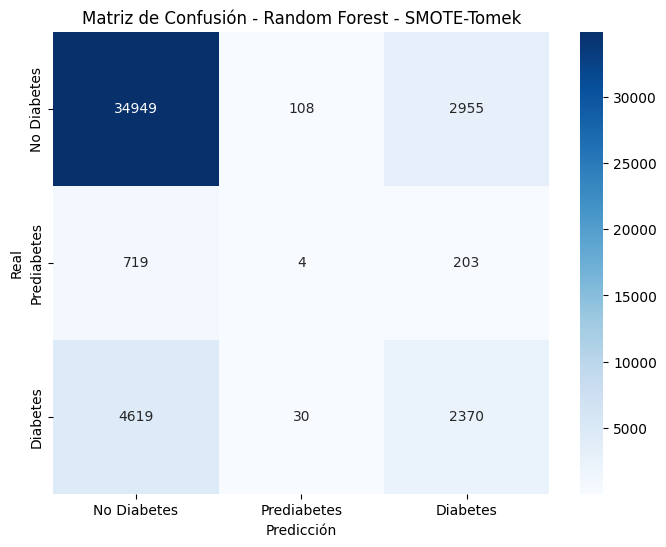


Resultados para Gradient Boosting:

  Conjunto de entrenamiento: Original
  Tiempo de entrenamiento: 86.01 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.59      0.20      0.30      7019

    accuracy                           0.84     45957
   macro avg       0.48      0.39      0.40     45957
weighted avg       0.79      0.84      0.80     45957



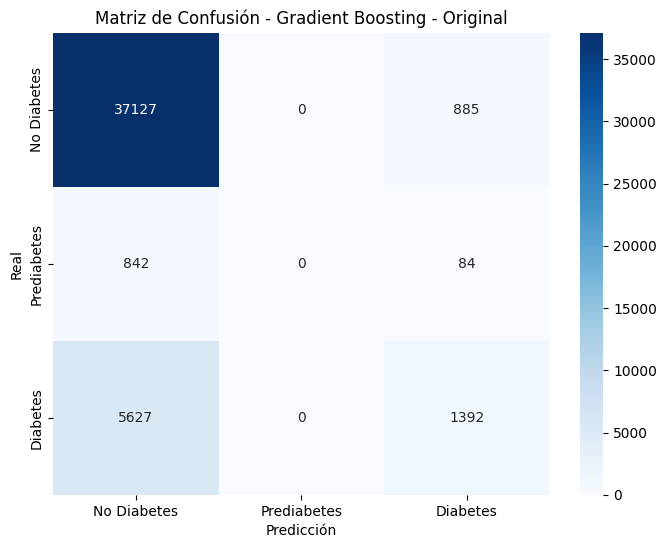


  Conjunto de entrenamiento: SMOTE
  Tiempo de entrenamiento: 568.38 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.42      0.51      0.46      7019

    accuracy                           0.81     45957
   macro avg       0.44      0.46      0.45     45957
weighted avg       0.80      0.81      0.80     45957



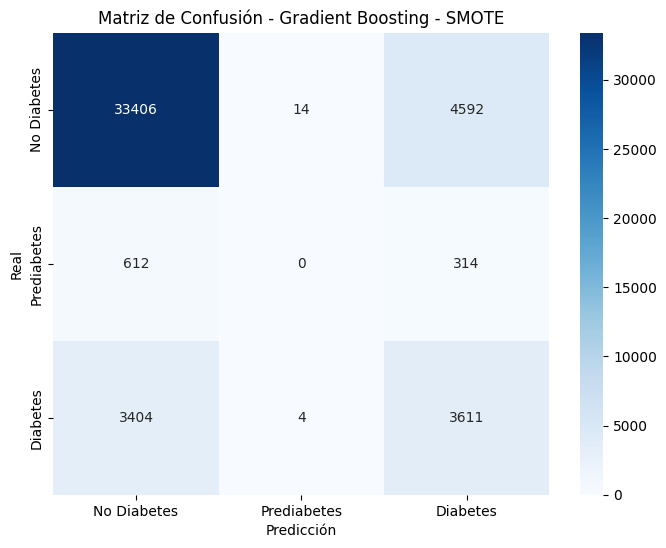


  Conjunto de entrenamiento: RUS
  Tiempo de entrenamiento: 3.17 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.61      0.74     38012
         1.0       0.03      0.34      0.06       926
         2.0       0.36      0.60      0.45      7019

    accuracy                           0.60     45957
   macro avg       0.45      0.52      0.42     45957
weighted avg       0.84      0.60      0.68     45957



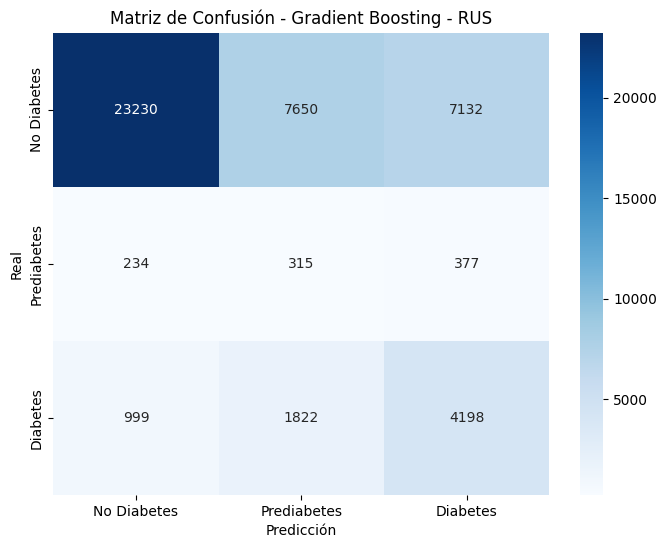


  Conjunto de entrenamiento: SMOTE-ENN
  Tiempo de entrenamiento: 522.08 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.94      0.69      0.79     38012
 Prediabetes       0.03      0.05      0.04       926
    Diabetes       0.32      0.76      0.46      7019

    accuracy                           0.69     45957
   macro avg       0.43      0.50      0.43     45957
weighted avg       0.83      0.69      0.73     45957



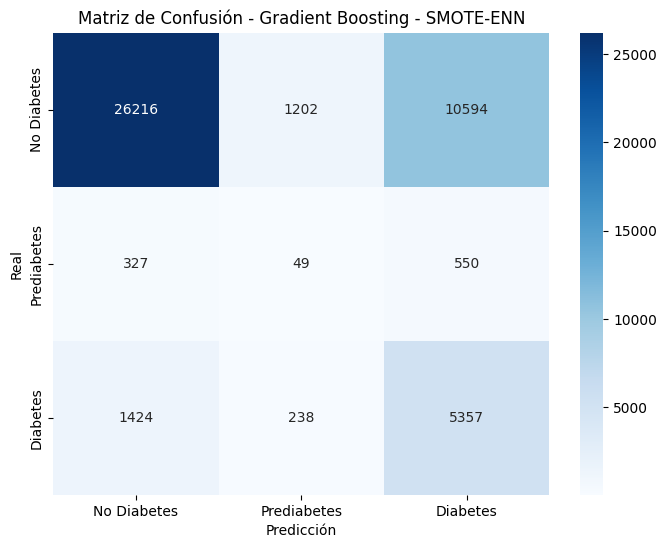


  Conjunto de entrenamiento: SMOTE-Tomek
  Tiempo de entrenamiento: 592.02 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.89      0.88      0.89     38012
 Prediabetes       0.00      0.00      0.00       926
    Diabetes       0.42      0.51      0.46      7019

    accuracy                           0.81     45957
   macro avg       0.44      0.46      0.45     45957
weighted avg       0.80      0.81      0.80     45957



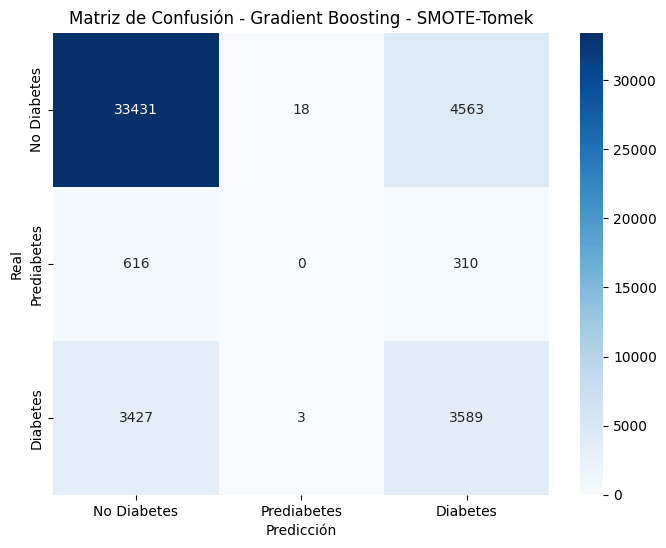


Resultados para KNN:

  Conjunto de entrenamiento: Original
  Tiempo de entrenamiento: 0.03 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     38012
         1.0       0.05      0.00      0.00       926
         2.0       0.41      0.21      0.27      7019

    accuracy                           0.82     45957
   macro avg       0.44      0.39      0.39     45957
weighted avg       0.77      0.82      0.78     45957



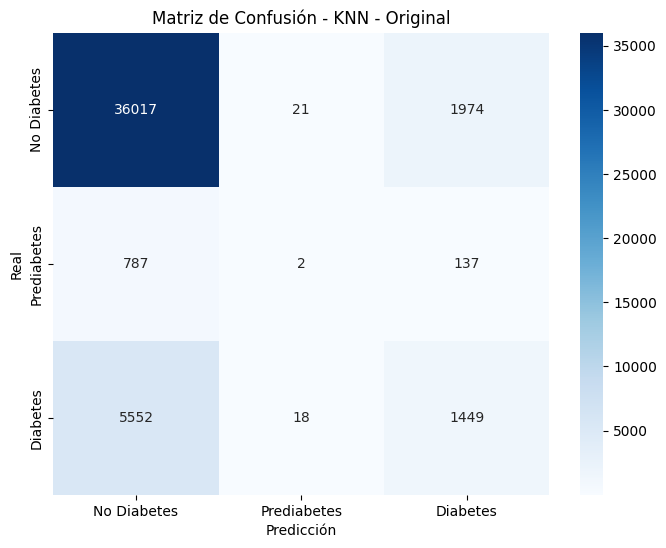


  Conjunto de entrenamiento: SMOTE
  Tiempo de entrenamiento: 0.04 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.66      0.76     38012
         1.0       0.03      0.12      0.05       926
         2.0       0.27      0.54      0.36      7019

    accuracy                           0.63     45957
   macro avg       0.40      0.44      0.39     45957
weighted avg       0.79      0.63      0.69     45957



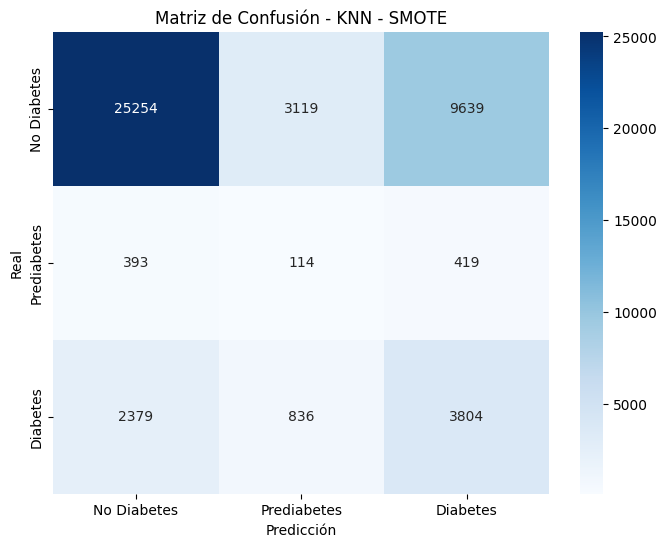


  Conjunto de entrenamiento: RUS
  Tiempo de entrenamiento: 0.00 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.59      0.72     38012
         1.0       0.03      0.35      0.05       926
         2.0       0.31      0.37      0.34      7019

    accuracy                           0.56     45957
   macro avg       0.41      0.44      0.37     45957
weighted avg       0.80      0.56      0.65     45957



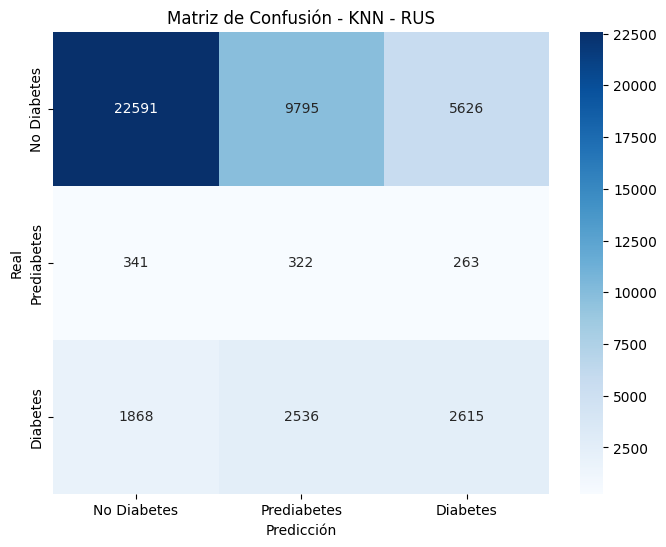


  Conjunto de entrenamiento: SMOTE-ENN
  Tiempo de entrenamiento: 0.31 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.93      0.56      0.70     38012
 Prediabetes       0.03      0.17      0.04       926
    Diabetes       0.27      0.65      0.38      7019

    accuracy                           0.56     45957
   macro avg       0.41      0.46      0.37     45957
weighted avg       0.81      0.56      0.64     45957



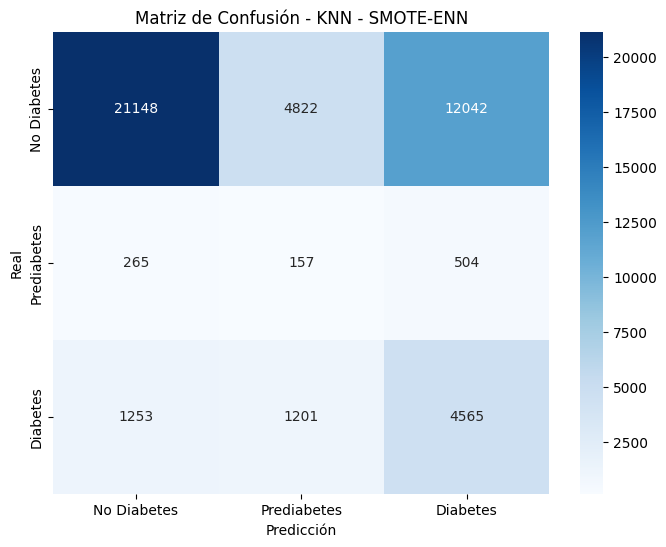


  Conjunto de entrenamiento: SMOTE-Tomek
  Tiempo de entrenamiento: 0.46 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.90      0.66      0.76     38012
 Prediabetes       0.03      0.13      0.05       926
    Diabetes       0.27      0.54      0.37      7019

    accuracy                           0.63     45957
   macro avg       0.40      0.44      0.39     45957
weighted avg       0.79      0.63      0.69     45957



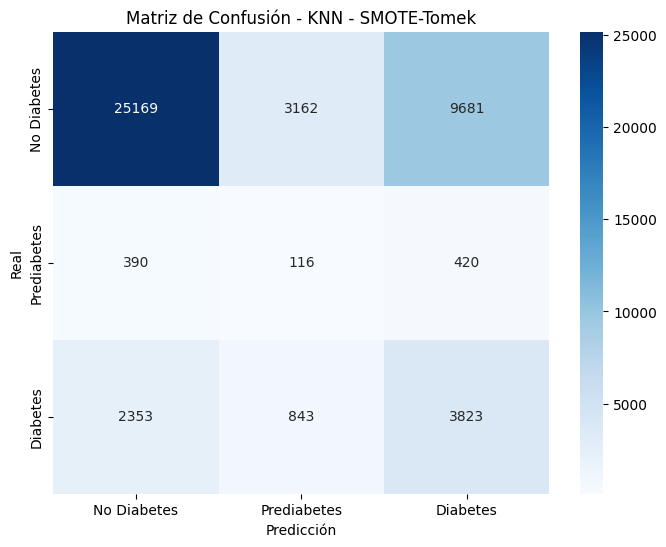


Resultados para Naive Bayes:

  Conjunto de entrenamiento: Original
  Tiempo de entrenamiento: 0.06 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84     38012
         1.0       0.04      0.01      0.02       926
         2.0       0.33      0.57      0.42      7019

    accuracy                           0.74     45957
   macro avg       0.42      0.46      0.43     45957
weighted avg       0.79      0.74      0.76     45957



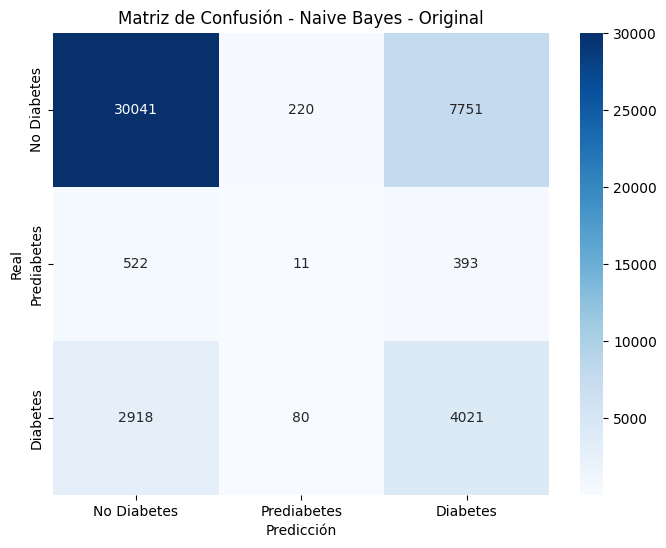


  Conjunto de entrenamiento: SMOTE
  Tiempo de entrenamiento: 0.15 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.64      0.76     38012
         1.0       0.03      0.21      0.05       926
         2.0       0.33      0.61      0.43      7019

    accuracy                           0.62     45957
   macro avg       0.43      0.49      0.41     45957
weighted avg       0.82      0.62      0.69     45957



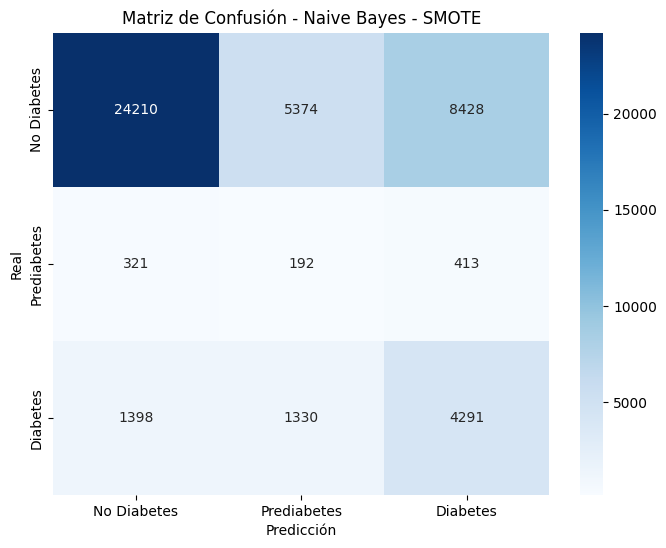


  Conjunto de entrenamiento: RUS
  Tiempo de entrenamiento: 0.00 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.65      0.76     38012
         1.0       0.03      0.08      0.04       926
         2.0       0.30      0.71      0.43      7019

    accuracy                           0.65     45957
   macro avg       0.42      0.48      0.41     45957
weighted avg       0.81      0.65      0.70     45957



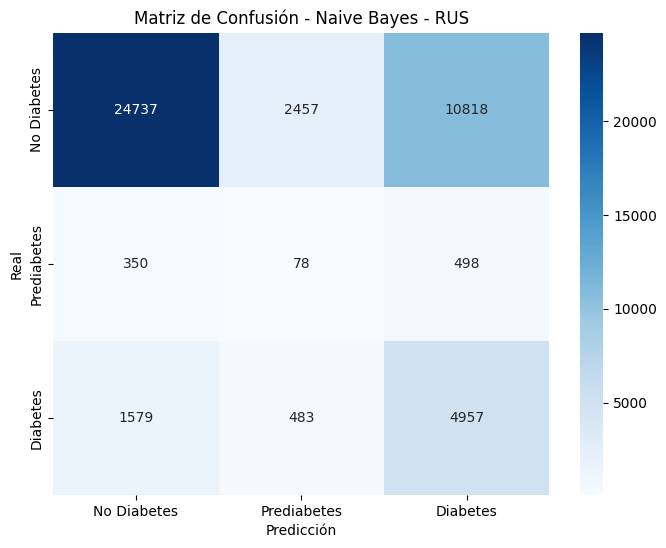


  Conjunto de entrenamiento: SMOTE-ENN
  Tiempo de entrenamiento: 0.35 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.94      0.62      0.74     38012
 Prediabetes       0.03      0.29      0.05       926
    Diabetes       0.35      0.55      0.42      7019

    accuracy                           0.60     45957
   macro avg       0.44      0.48      0.41     45957
weighted avg       0.83      0.60      0.68     45957



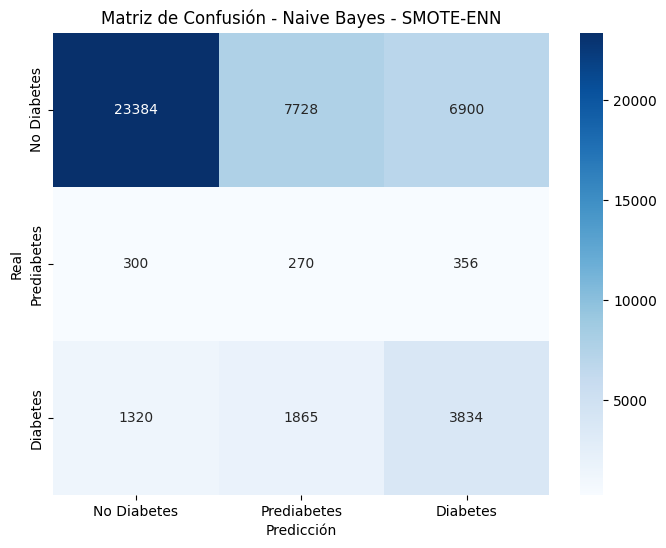


  Conjunto de entrenamiento: SMOTE-Tomek
  Tiempo de entrenamiento: 0.61 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.94      0.63      0.75     38012
 Prediabetes       0.03      0.22      0.05       926
    Diabetes       0.33      0.60      0.43      7019

    accuracy                           0.62     45957
   macro avg       0.43      0.49      0.41     45957
weighted avg       0.82      0.62      0.69     45957



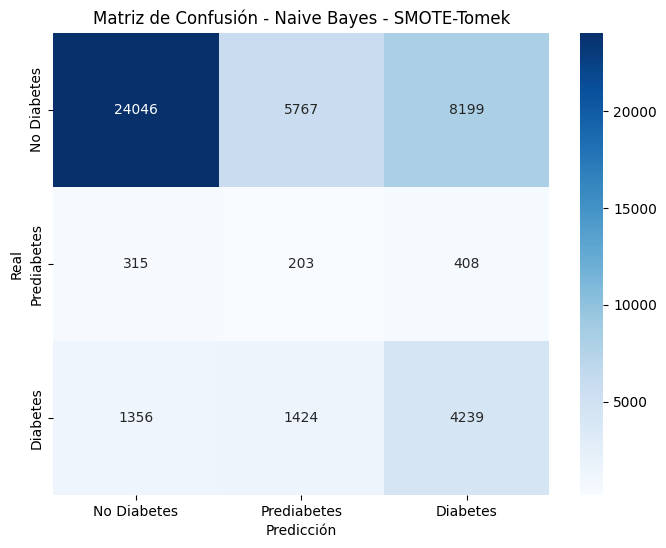


Resultados para XGBoost:

  Conjunto de entrenamiento: Original
  Tiempo de entrenamiento: 4.00 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.57      0.20      0.30      7019

    accuracy                           0.84     45957
   macro avg       0.47      0.39      0.40     45957
weighted avg       0.79      0.84      0.80     45957



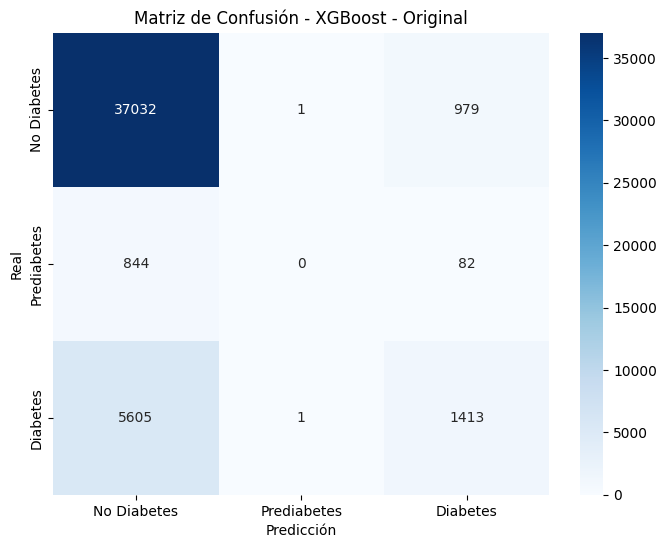


  Conjunto de entrenamiento: SMOTE
  Tiempo de entrenamiento: 10.91 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.54      0.25      0.34      7019

    accuracy                           0.84     45957
   macro avg       0.47      0.41      0.42     45957
weighted avg       0.79      0.84      0.80     45957



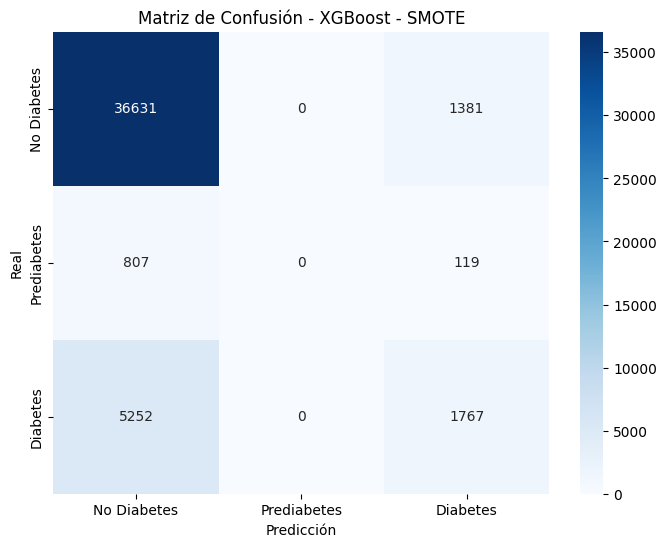


  Conjunto de entrenamiento: RUS
  Tiempo de entrenamiento: 0.46 segundos
  Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.58      0.72     38012
         1.0       0.03      0.36      0.05       926
         2.0       0.34      0.54      0.41      7019

    accuracy                           0.57     45957
   macro avg       0.44      0.49      0.40     45957
weighted avg       0.83      0.57      0.66     45957



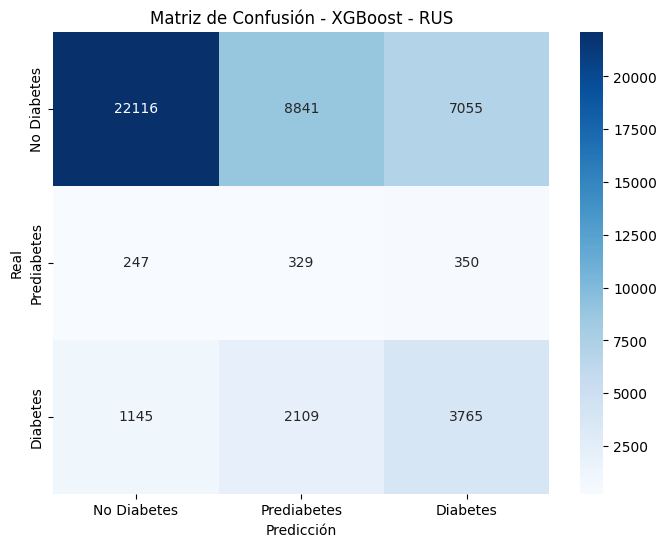


  Conjunto de entrenamiento: SMOTE-ENN
  Tiempo de entrenamiento: 14.00 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.92      0.80      0.85     38012
 Prediabetes       0.07      0.01      0.01       926
    Diabetes       0.37      0.66      0.48      7019

    accuracy                           0.76     45957
   macro avg       0.45      0.49      0.45     45957
weighted avg       0.82      0.76      0.78     45957



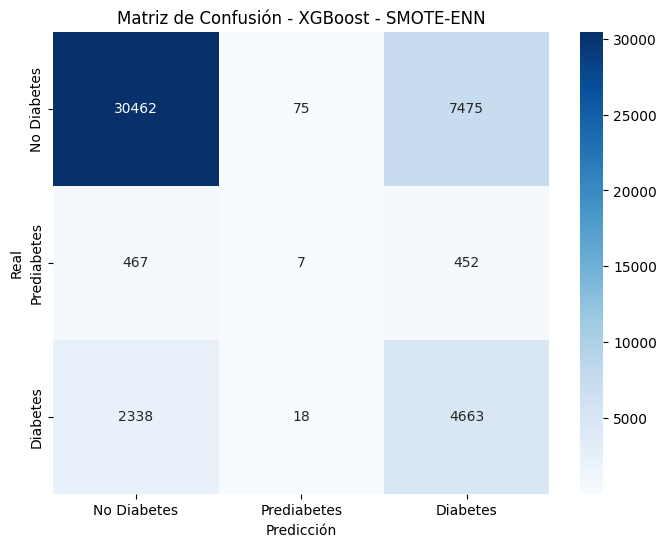


  Conjunto de entrenamiento: SMOTE-Tomek
  Tiempo de entrenamiento: 19.99 segundos
  Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.86      0.96      0.91     38012
 Prediabetes       0.00      0.00      0.00       926
    Diabetes       0.54      0.26      0.35      7019

    accuracy                           0.84     45957
   macro avg       0.47      0.41      0.42     45957
weighted avg       0.79      0.84      0.80     45957



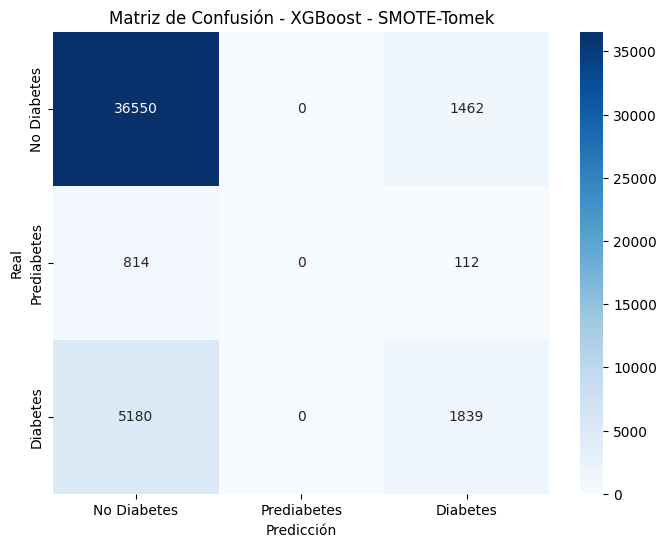

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time
import joblib
import os
import pyarrow.parquet as pq

# Importar las clases de imbalanced-learn para las técnicas híbridas
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# --- Configuración de persistencia para cargar datos ---
data_dir = '../data/processed_data'

X_train_scaled_path = os.path.join(data_dir, 'X_train_scaled.parquet')
X_test_scaled_path = os.path.join(data_dir, 'X_test_scaled.parquet')
y_train_path = os.path.join(data_dir, 'y_train.parquet')
y_test_path = os.path.join(data_dir, 'y_test.parquet')
X_train_smote_path = os.path.join(data_dir, 'X_train_smote.parquet')
y_train_smote_path = os.path.join(data_dir, 'y_train_smote.parquet')
X_train_rus_path = os.path.join(data_dir, 'X_train_rus.parquet')
y_train_rus_path = os.path.join(data_dir, 'y_train_rus.parquet')
scaler_path = os.path.join(data_dir, 'scaler.joblib')

# --- Función auxiliar para verificar la validez de los archivos Parquet ---
def is_valid_parquet(filepath):
    if not os.path.exists(filepath):
        return False
    if os.path.getsize(filepath) == 0:
        return False
    try:
        pq.read_metadata(filepath)
        return True
    except Exception as e:
        return False

# --- Cargar datos preprocesados ---
print("Intentando cargar datos preprocesados...")
try:
    if not (is_valid_parquet(X_train_scaled_path) and
            is_valid_parquet(X_test_scaled_path) and
            is_valid_parquet(y_train_path) and
            is_valid_parquet(y_test_path) and
            is_valid_parquet(X_train_smote_path) and
            is_valid_parquet(y_train_smote_path) and
            is_valid_parquet(X_train_rus_path) and
            is_valid_parquet(y_train_rus_path) and
            os.path.exists(scaler_path)):
        raise FileNotFoundError("Algunos archivos de datos preprocesados o el escalador no existen o están corruptos.")

    X_train_scaled = pd.read_parquet(X_train_scaled_path)
    X_test_scaled = pd.read_parquet(X_test_scaled_path)
    y_train = pd.read_parquet(y_train_path).squeeze()
    y_test = pd.read_parquet(y_test_path).squeeze()

    # Cargar los datasets SMOTE y RUS preexistentes
    X_train_smote_prev = pd.read_parquet(X_train_smote_path)
    y_train_smote_prev = pd.read_parquet(y_train_smote_path).squeeze()
    X_train_rus_prev = pd.read_parquet(X_train_rus_path)
    y_train_rus_prev = pd.read_parquet(y_train_rus_path).squeeze()

    scaler = joblib.load(scaler_path)
    print("Datos preprocesados cargados exitosamente.")

except Exception as e:
    print(f"\nERROR: No se pudieron cargar todos los datos preprocesados. Por favor, asegúrate de haber ejecutado el script de preprocesamiento y persistencia y que los archivos estén en la ruta correcta: {data_dir}")
    print(f"Detalle del error: {e}")
    raise

# --- Configuración de persistencia para modelos y resultados ---
models_dir = 'trained_models'
results_file = 'results_metrics.joblib'

if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"Directorio de modelos creado: {models_dir}")

results = {}
if os.path.exists(results_file):
    try:
        results = joblib.load(results_file)
        print(f"Resultados previos cargados desde {results_file}")
    except Exception as e:
        print(f"Error al cargar resultados previos: {e}. Se inicializarán los resultados.")
        results = {}
else:
    print("No se encontraron resultados previos. Se inicializarán los resultados.")

# Modelos a entrenar
normal_models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr', class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

# Asegurarse de que el diccionario de resultados tenga las claves de los modelos
for name in normal_models:
    if name not in results:
        results[name] = {}

# --- APLICACIÓN DE TÉCNICAS DE REMUESTREO HÍBRIDAS ---
print("\nAplicando técnicas de remuestreo híbridas (SMOTE-ENN y SMOTE-Tomek)...")

# SMOTE-ENN
# Puedes ajustar `sampling_strategy` si quieres un control más granular sobre el balance de clases.
# Por defecto, 'auto' o 'not majority' intentarán balancear todas las clases.
smote_enn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train_scaled, y_train)
print(f"Dataset SMOTE-ENN: X_train_smoteenn.shape={X_train_smoteenn.shape}, y_train_smoteenn.shape={y_train_smoteenn.shape}")
print(f"Conteo de clases SMOTE-ENN:\n{y_train_smoteenn.value_counts()}")


# SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smote_tomek.fit_resample(X_train_scaled, y_train)
print(f"Dataset SMOTE-Tomek: X_train_smotetomek.shape={X_train_smotetomek.shape}, y_train_smotetomek.shape={y_train_smotetomek.shape}")
print(f"Conteo de clases SMOTE-Tomek:\n{y_train_smotetomek.value_counts()}")


# Conjuntos de entrenamiento a utilizar (ahora incluyendo las nuevas opciones)
train_sets_general = {
    'Original': (X_train_scaled, y_train),
    'SMOTE': (X_train_smote_prev, y_train_smote_prev), # Se mantienen los SMOTE/RUS previos si quieres comparar
    'RUS': (X_train_rus_prev, y_train_rus_prev),
    'SMOTE-ENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTE-Tomek': (X_train_smotetomek, y_train_smotetomek)
}

# --- Entrenamiento de los modelos "normales" ---
print("\n--- Iniciando/Revisando entrenamiento de modelos normales ---")
for name, model_instance in normal_models.items():
    for set_name, (X_train_set, y_train_set) in train_sets_general.items():
        if name in results and set_name in results[name] and 'classification_report' in results[name][set_name]:
            print(f"Saltando entrenamiento de {name} con datos {set_name} (ya procesado y guardado).")
            continue

        start_time = time.time()
        print(f"Entrenando {name} con datos {set_name}...")
        model_instance.fit(X_train_set, y_train_set)
        end_time = time.time()
        training_time = end_time - start_time
        print(f"Entrenamiento completado en {training_time:.2f} segundos.")

        y_pred = model_instance.predict(X_test_scaled)
        # Asegúrate de usar target_names para una mejor lectura del informe
        report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
        cm = confusion_matrix(y_test, y_pred)
        
        if name not in results:
            results[name] = {}
        results[name][set_name] = {'classification_report': report, 'confusion_matrix': cm, 'training_time': training_time}

        model_filename = os.path.join(models_dir, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}.joblib")
        joblib.dump(model_instance, model_filename)
        print(f"Modelo guardado: {model_filename}")

    joblib.dump(results, results_file)
    print(f"Resultados actuales guardados en {results_file}")

print("\n--- Entrenamiento de modelos normales completado ---")

# --- Mostrar resultados de los modelos entrenados/cargados en este snippet ---
print("\n--- RESUMEN DE RESULTADOS DE LOS MODELOS NORMALES ---")
for model_name, model_results in results.items():
    if model_name in normal_models:
        print(f"\nResultados para {model_name}:")
        for set_name, metrics in model_results.items():
            # Asegurarnos de que el conjunto de datos también está en los que usa este snippet
            if set_name in train_sets_general:
                print(f"\n  Conjunto de entrenamiento: {set_name}")
                print("  Tiempo de entrenamiento:", f"{metrics['training_time']:.2f} segundos")
                print("  Classification Report:")
                print(metrics['classification_report'])
                
                plt.figure(figsize=(8, 6))
                sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                            xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                            yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
                plt.title(f'Matriz de Confusión - {model_name} - {set_name}')
                plt.xlabel('Predicción')
                plt.ylabel('Real')
                plt.show()

No hay problema si SMOTE-ENN y SMOTE-Tomek no fueron la "bala de plata"; esto es parte del proceso iterativo. Ahora nos enfocamos en la optimización de hiperparámetros y la persistencia de resultados.

### Selección de Modelos para Optimización

Basado en los resultados que me proporcionaste, y buscando un equilibrio entre rendimiento inicial y potencial de mejora:

  * **Logistic Regression (Regresión Logística):** Muestra un recall de 0.27 (SMOTE) y 0.25 (RUS) para la clase 1.0, lo cual es de lo mejor que hemos visto hasta ahora, aunque la precisión sigue siendo baja. Es un modelo rápido y transparente.
  * **Gradient Boosting (GradientBoostingClassifier):** En el conjunto RUS, logra un recall de 0.34 para la clase 1.0, aunque con precisión baja. Su versión Original es buena para las otras clases. Es potente.
  * **XGBoost:** Similar a Gradient Boosting, con 0.36 de recall en RUS para la clase 1.0. Es un algoritmo de boosting muy eficiente y popular.
  * **Random Forest:** Aunque su recall en SMOTE y Original es muy bajo para la clase 1.0 (0.00), en RUS alcanza 0.34, lo que lo hace interesante para optimizar.

**Conclusión para la selección:** Optaremos por **Logistic Regression, Random Forest, Gradient Boosting y XGBoost**. Son modelos potentes y versátiles que ofrecen un buen equilibrio entre interpretabilidad y rendimiento, y tienen un potencial claro de mejora con el ajuste de hiperparámetros.

### Estrategia de Implementación

Sí, la idea es **sumar las técnicas de remuestreo (incluyendo SMOTE-ENN y SMOTE-Tomek) con la optimización de hiperparámetros (GridSearchCV/RandomizedSearchCV)**. Es decir, para cada combinación de Modelo y Técnica de Remuestreo (Original, SMOTE, RUS, SMOTE-ENN, SMOTE-Tomek), intentaremos encontrar los mejores hiperparámetros.

También implementaremos la **persistencia de los reportes en archivos `.md` o `.txt`** en la ruta `../docs/model_performance_reports/`.

### Código Modificado (Snippet 1 - Model Training, ahora con Optimización de Hiperparámetros y Persistencia de Reportes)

Este código se construirá sobre el último que te di, añadiendo la optimización y el guardado de reportes.

Necesitarás importar `GridSearchCV` y `RandomizedSearchCV`:


### Cambios Clave y Notas Importantes:

1.  **Importaciones:** Se añaden `GridSearchCV`, `RandomizedSearchCV`, y `make_scorer`, `f1_score`, `recall_score` para las métricas personalizadas.
2.  **`reports_dir`:** Se crea el directorio `../docs/model_performance_reports/` para guardar los informes.
3.  **Modelos para `tuning`:** Los modelos seleccionados (`Logistic Regression`, `Random Forest`, `Gradient Boosting`, `XGBoost`) se agrupan en `models_for_tuning`.
4.  **`param_grids`:** Se definen diccionarios de rangos de hiperparámetros para cada modelo.
      * **¡MUY IMPORTANTE\!** He puesto rangos iniciales razonables, pero la optimización de hiperparámetros es un proceso iterativo.
      * **Comienza con `RandomizedSearchCV` (`n_iter=20` o similar):** Es más rápido y bueno para explorar un espacio grande de parámetros. Si el tiempo de ejecución es demasiado alto, reduce `n_iter`.
      * **Aumenta `n_iter` o cambia a `GridSearchCV`:** Una vez que identifiques rangos prometedores, puedes aumentar `n_iter` en `RandomizedSearchCV` o cambiar a `GridSearchCV` para una búsqueda exhaustiva en esos rangos más pequeños.
5.  **`train_sets_for_tuning`:** Se ajusta para incluir los datasets originales, SMOTE, RUS (si se cargaron) y los nuevos SMOTE-ENN y SMOTE-Tomek. Se incluye una comprobación para `None` en caso de que los archivos `_prev` no existieran.
6.  **`scoring_metrics` y `make_scorer`:**
      * He definido `scorer_f1_weighted` como la métrica principal para la optimización (`scoring=scorer_f1_weighted`). Esta métrica es un buen punto de partida porque considera el desequilibrio de clases.
      * También he añadido `scorer_prediabetes_recall` (`make_scorer(recall_score, average=None, labels=[1.0])`) para que puedas usarlo como una métrica si quieres que el `GridSearchCV` optimice específicamente para el *recall* de la clase "Prediabetes". Para cambiar la métrica de optimización, simplemente modifica la línea `scoring=...` dentro del `RandomizedSearchCV`.
7.  **Bucle de Optimización:**
      * Se introduce un bucle anidado para iterar sobre cada modelo y cada conjunto de entrenamiento.
      * Dentro, se utiliza `RandomizedSearchCV` (o `GridSearchCV` si lo cambias) para encontrar los mejores hiperparámetros.
      * `n_jobs=-1` es crucial para usar todos los núcleos de tu CPU y acelerar la búsqueda.
      * Se guarda el mejor modelo, sus parámetros y el score CV.
8.  **Persistencia de Reportes (`.md`):**
      * Después de cada optimización, se genera un archivo Markdown (`.md`) con el nombre del modelo, la técnica de remuestreo, los mejores parámetros, el tiempo de optimización y el `classification_report` y `confusion_matrix` resultantes. Esto te dará un registro claro de cada experimento.
9.  **Persistencia de Modelos Optimizados:** Se guarda el `best_model` de cada `RandomizedSearchCV` (o `GridSearchCV`) en la carpeta `trained_models`.
10. **Comprobación de Existencia:** Se añade lógica para saltar la optimización si un modelo ya fue optimizado y guardado con ese conjunto de datos.

**Antes de Ejecutar:**

  * **Revisa los `param_grids`:** Asegúrate de que los rangos de parámetros son adecuados para tus modelos y el tiempo que estás dispuesto a esperar. Si el proceso es demasiado lento, reduce el número de valores en cada lista o el `n_iter` de `RandomizedSearchCV`.
  * **Recursos:** La optimización de hiperparámetros puede ser intensiva en recursos (CPU y RAM). Cierra otras aplicaciones si tienes problemas de rendimiento.
  * **Paciencia:** Este paso puede llevar tiempo, especialmente con Random Forest y Gradient Boosting/XGBoost en datasets más grandes y con más `n_iter` o más valores de parámetros.

¡Una vez que tengas los resultados de este paso, analizaremos qué configuraciones funcionaron mejor para la clase "Prediabetes"\!

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import time
import joblib
import os
import pyarrow.parquet as pq

# Importar las clases de imbalanced-learn para las técnicas híbridas
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE # Mantener por si se usa en los datos pre-guardados
from imblearn.under_sampling import RandomUnderSampler # Mantener por si se usa en los datos pre-guardados

# Importar para optimización de hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# --- Configuración de persistencia para cargar datos ---
data_dir = '../data/processed_data'

X_train_scaled_path = os.path.join(data_dir, 'X_train_scaled.parquet')
X_test_scaled_path = os.path.join(data_dir, 'X_test_scaled.parquet')
y_train_path = os.path.join(data_dir, 'y_train.parquet')
y_test_path = os.path.join(data_dir, 'y_test.parquet')
X_train_smote_path = os.path.join(data_dir, 'X_train_smote.parquet')
y_train_smote_path = os.path.join(data_dir, 'y_train_smote.parquet')
X_train_rus_path = os.path.join(data_dir, 'X_train_rus.parquet')
y_train_rus_path = os.path.join(data_dir, 'y_train_rus.parquet')
scaler_path = os.path.join(data_dir, 'scaler.joblib')

# --- Rutas para guardar informes de rendimiento ---
reports_dir = '../docs/model_performance_reports'
if not os.path.exists(reports_dir):
    os.makedirs(reports_dir)
    print(f"Directorio de informes creado: {reports_dir}")

# --- Función auxiliar para verificar la validez de los archivos Parquet ---
def is_valid_parquet(filepath):
    if not os.path.exists(filepath):
        return False
    if os.path.getsize(filepath) == 0:
        return False
    try:
        pq.read_metadata(filepath)
        return True
    except Exception as e:
        return False

# --- Cargar datos preprocesados ---
print("Intentando cargar datos preprocesados...")
try:
    if not (is_valid_parquet(X_train_scaled_path) and
            is_valid_parquet(X_test_scaled_path) and
            is_valid_parquet(y_train_path) and
            is_valid_parquet(y_test_path) and
            os.path.exists(scaler_path)): # Solo verificamos los principales para no fallar si los remuestreados no existen
        raise FileNotFoundError("Algunos archivos de datos preprocesados o el escalador no existen o están corruptos.")

    X_train_scaled = pd.read_parquet(X_train_scaled_path)
    X_test_scaled = pd.read_parquet(X_test_scaled_path)
    y_train = pd.read_parquet(y_train_path).squeeze()
    y_test = pd.read_parquet(y_test_path).squeeze()
    scaler = joblib.load(scaler_path)
    print("Datos preprocesados cargados exitosamente.")

    # Cargar los datasets SMOTE y RUS preexistentes si existen, sino se crearán o se usarán las nuevas híbridas
    X_train_smote_prev, y_train_smote_prev = None, None
    if is_valid_parquet(X_train_smote_path) and is_valid_parquet(y_train_smote_path):
        X_train_smote_prev = pd.read_parquet(X_train_smote_path)
        y_train_smote_prev = pd.read_parquet(y_train_smote_path).squeeze()
        print("Datos SMOTE previos cargados.")

    X_train_rus_prev, y_train_rus_prev = None, None
    if is_valid_parquet(X_train_rus_path) and is_valid_parquet(y_train_rus_path):
        X_train_rus_prev = pd.read_parquet(X_train_rus_path)
        y_train_rus_prev = pd.read_parquet(y_train_rus_path).squeeze()
        print("Datos RUS previos cargados.")

except Exception as e:
    print(f"\nERROR: No se pudieron cargar todos los datos preprocesados. Por favor, asegúrate de haber ejecutado el script de preprocesamiento y persistencia y que los archivos estén en la ruta correcta: {data_dir}")
    print(f"Detalle del error: {e}")
    raise

# --- Configuración de persistencia para modelos y resultados ---
models_dir = 'trained_models'
results_file = 'results_metrics.joblib'

if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"Directorio de modelos creado: {models_dir}")

results = {}
if os.path.exists(results_file):
    try:
        results = joblib.load(results_file)
        print(f"Resultados previos cargados desde {results_file}")
    except Exception as e:
        print(f"Error al cargar resultados previos: {e}. Se inicializarán los resultados.")
        results = {}
else:
    print("No se encontraron resultados previos. Se inicializarán los resultados.")

# Modelos seleccionados para optimización de hiperparámetros
models_for_tuning = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr', class_weight='balanced', max_iter=5000), # Aumentar max_iter
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=3)
}

# Parámetros para GridSearchCV/RandomizedSearchCV
# IMPORTANTE: Estos son rangos iniciales. Ajusta según la complejidad y tiempo.
# Para empezar, usa RandomizedSearchCV con n_iter más bajo para una búsqueda más rápida.
# Luego, si encuentras rangos prometedores, usa GridSearchCV para un ajuste fino.
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300], # Menos estimadores para empezar, aumenta si los tiempos lo permiten
        'max_features': ['sqrt', 'log2'],
        'max_depth': [10, 20, 30, None],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 0.9]
    }
}

# --- APLICACIÓN DE TÉCNICAS DE REMUESTREO HÍBRIDAS ---
print("\nAplicando técnicas de remuestreo híbridas (SMOTE-ENN y SMOTE-Tomek)...")

smote_enn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train_scaled, y_train)
print(f"Dataset SMOTE-ENN: X_train_smoteenn.shape={X_train_smoteenn.shape}, y_train_smoteenn.shape={y_train_smoteenn.shape}")
print(f"Conteo de clases SMOTE-ENN:\n{y_train_smoteenn.value_counts()}")

smote_tomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smote_tomek.fit_resample(X_train_scaled, y_train)
print(f"Dataset SMOTE-Tomek: X_train_smotetomek.shape={X_train_smotetomek.shape}, y_train_smotetomek.shape={y_train_smotetomek.shape}")
print(f"Conteo de clases SMOTE-Tomek:\n{y_train_smotetomek.value_counts()}")

# Conjuntos de entrenamiento a utilizar para la optimización
train_sets_for_tuning = {
    'Original': (X_train_scaled, y_train),
    'SMOTE': (X_train_smote_prev, y_train_smote_prev) if X_train_smote_prev is not None else (None,None), # Usar el previo si existe
    'RUS': (X_train_rus_prev, y_train_rus_prev) if X_train_rus_prev is not None else (None,None), # Usar el previo si existe
    'SMOTE-ENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTE-Tomek': (X_train_smotetomek, y_train_smotetomek)
}

# Limpiar None values de train_sets_for_tuning si los previos no se cargaron
train_sets_for_tuning = {k: v for k, v in train_sets_for_tuning.items() if v[0] is not None}


# --- Scorer personalizado para priorizar la clase 'Prediabetes' (1.0) ---
# Puedes elegir entre f1_macro, f1_weighted, o recall_macro, recall_weighted, o recall_specific_for_class_1
# Para este problema, el recall de la clase 1 es CRÍTICO, y el f1-score macro o weighted también son buenos.
# Vamos a usar 'f1_weighted' para un buen balance general considerando el desequilibrio,
# y también podrías probar con 'recall_macro' o 'f1_macro' para dar igual peso a todas las clases.
# Para priorizar específicamente la clase 1.0 (prediabetes) en recall, puedes usar:
scorer_prediabetes_recall = make_scorer(recall_score, average=None, labels=[1.0])
scorer_f1_weighted = make_scorer(f1_score, average='weighted')
scorer_f1_macro = make_scorer(f1_score, average='macro')
scorer_recall_macro = make_scorer(recall_score, average='macro')


# Usaremos f1_weighted como métrica principal para GridSearch, pero se pueden probar otras.
# Se pueden pasar múltiples scorers a GridSearchCV si quieres evaluarlos.
scoring_metrics = {
    'f1_weighted': scorer_f1_weighted,
    'recall_prediabetes': scorer_prediabetes_recall, # Este evaluará el recall de la clase 1.0
    'f1_macro': scorer_f1_macro,
    'recall_macro': scorer_recall_macro
}


# --- Entrenamiento y Optimización de Hiperparámetros ---
print("\n--- Iniciando optimización de hiperparámetros (Grid/Randomized Search) ---")

for name, model_instance in models_for_tuning.items():
    print(f"\nProcesando modelo: {name}")
    for set_name, (X_train_set, y_train_set) in train_sets_for_tuning.items():
        if X_train_set is None: # Si el dataset no se cargó o generó, saltarlo
            print(f"Saltando {name} con datos {set_name}: Datos no disponibles.")
            continue

        # Clave para guardar los resultados de la optimización en 'results'
        result_key = f"{name}_tuned_with_{set_name}"

        # Comprobar si ya se optimizó este modelo con este dataset
        if result_key in results and 'best_params' in results[result_key]:
            print(f"Saltando optimización de {name} con datos {set_name} (ya optimizado y guardado).")
            # Cargar el modelo ya optimizado para mostrar resultados si está disponible
            optimized_model_filename = os.path.join(models_dir, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}_tuned.joblib")
            if os.path.exists(optimized_model_filename):
                optimized_model = joblib.load(optimized_model_filename)
                y_pred = optimized_model.predict(X_test_scaled)
                report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
                cm = confusion_matrix(y_test, y_pred)
                results[result_key]['classification_report'] = report
                results[result_key]['confusion_matrix'] = cm
                print(f"Resultados cargados para {result_key}.")
            continue

        print(f"Iniciando optimización para {name} con datos {set_name}...")
        
        # Usaremos RandomizedSearchCV para una búsqueda más eficiente inicialmente
        # Ajusta n_iter (número de combinaciones a probar) según el tiempo que puedas esperar
        # y cv (número de folds en la validación cruzada)
        search_cv = RandomizedSearchCV(
            estimator=model_instance,
            param_distributions=param_grids[name],
            n_iter=20, # Número de combinaciones de parámetros a probar
            scoring=scorer_f1_weighted, # Métrica principal para optimización
            cv=5, # 5-fold cross-validation
            verbose=2,
            n_jobs=-1, # Usar todos los núcleos de la CPU
            random_state=42,
            return_train_score=True # Para ver los scores de entrenamiento también
        )
        
        start_time_tune = time.time()
        search_cv.fit(X_train_set, y_train_set)
        end_time_tune = time.time()
        tuning_time = end_time_tune - start_time_tune
        print(f"Optimización completada en {tuning_time:.2f} segundos.")

        best_model = search_cv.best_estimator_
        best_params = search_cv.best_params_
        best_score = search_cv.best_score_

        print(f"Mejores parámetros encontrados: {best_params}")
        print(f"Mejor {search_cv.scoring} (CV score): {best_score:.4f}")

        # Evaluar el mejor modelo en el conjunto de prueba
        y_pred = best_model.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
        cm = confusion_matrix(y_test, y_pred)
        
        # Guardar resultados de la optimización en el diccionario global
        results[result_key] = {
            'best_model': best_model, # Guarda el modelo optimizado
            'best_params': best_params,
            'best_cv_score': best_score,
            'tuning_time': tuning_time,
            'classification_report': report,
            'confusion_matrix': cm
        }

        # Guardar el modelo optimizado
        optimized_model_filename = os.path.join(models_dir, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}_tuned.joblib")
        joblib.dump(best_model, optimized_model_filename)
        print(f"Modelo optimizado guardado: {optimized_model_filename}")

        # Guardar el informe en un archivo .md
        report_filename = os.path.join(reports_dir, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}_tuned_report.md")
        with open(report_filename, 'w') as f:
            f.write(f"# Reporte de Rendimiento para {name} (Optimizado con {set_name})\n\n")
            f.write(f"**Mejores Parámetros (CV):**\n```json\n{best_params}\n```\n\n")
            f.write(f"**Mejor F1-Weighted Score (CV):** {best_score:.4f}\n\n")
            f.write(f"**Tiempo de Optimización:** {tuning_time:.2f} segundos\n\n")
            f.write("## Classification Report en el Conjunto de Prueba\n")
            f.write("```\n")
            f.write(report)
            f.write("```\n\n")
            f.write("## Matriz de Confusión en el Conjunto de Prueba\n")
            f.write("```\n")
            f.write(str(cm))
            f.write("\n```\n")
        print(f"Informe guardado: {report_filename}")

    # Guardar los resultados globales después de cada modelo (para persistencia incremental)
    joblib.dump(results, results_file)
    print(f"Resultados actuales guardados en {results_file}")

print("\n--- Optimización de hiperparámetros completada ---")

# --- Mostrar todos los resultados de los modelos optimizados ---
print("\n--- RESUMEN DE RESULTADOS DE LOS MODELOS OPTIMIZADOS ---")
for result_key, metrics_data in results.items():
    # Solo mostramos los resultados de los modelos que hemos tuneado
    if "tuned" in result_key: # Esto es un filtro simple para los resultados tuneados
        model_name = result_key.split('_tuned_with_')[0].replace('_', ' ')
        set_name = result_key.split('_tuned_with_')[-1]
        
        print(f"\nResultados para {model_name} (Optimizado con {set_name}):")
        print(f"  Mejores Parámetros: {metrics_data.get('best_params', 'N/A')}")
        print(f"  Mejor Score CV ({search_cv.scoring}): {metrics_data.get('best_cv_score', 'N/A'):.4f}")
        print(f"  Tiempo de Optimización: {metrics_data.get('tuning_time', 'N/A'):.2f} segundos")
        print("  Classification Report:")
        print(metrics_data['classification_report'])
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(metrics_data['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                    yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
        plt.title(f'Matriz de Confusión - {model_name} (Optimizado con {set_name})')
        plt.xlabel('Predicción')
        plt.ylabel('Real')
        plt.show()